In [1]:
#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install subprocess.run
# NOTE: It requieres TensorFlow and Keras

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_absolute_error 

# Needed to show plots inline for notebooks
%matplotlib inline

# Research Question

The way that individuals in residential areas use energy and how total energy is distributed across various end uses is essential to design future energy demand and produce suggestions to improve the efficiency in the use of energy and building design. 

* Based on the "Residential Energy Consumption Survey" RECS dataset can we build a model that predicts electric consumption in KWH?


## Data
The dataset can be found and dowloaded from the following link
https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata

In [3]:
#Import Data
data_rec=pd.read_csv('recs2009_public.csv')
data_rec.head(5)

C:\Users\davje\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [4]:
data_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, DOEID to DesignDBT1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


In [5]:
data_rec.describe()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,PERIODKR,SCALEKER,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,...,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,6042.000000,2.628321,5.373086,14.783663,2.659604,9402.981870,4141.375238,1415.406108,4135.146983,1443.503104,...,-1.935943,-1.955392,1681.961764,139.568485,3763.728544,0.499036,5.656046,59.128693,20.256311,90.359431
std,3488.205986,1.042142,2.859366,8.195824,1.192627,5192.101419,2317.759375,1134.659475,2260.543686,1021.748722,...,0.589907,0.415810,1401.079218,264.186908,2597.754419,0.083520,6.797205,8.678293,15.337626,6.166669
min,1.000000,1.000000,1.000000,1.000000,1.000000,476.100000,0.000000,0.000000,0.000000,0.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.310000,0.000000,36.000000,-23.000000,60.000000
25%,3021.500000,2.000000,3.000000,8.000000,2.000000,6297.040000,2197.500000,561.000000,2224.000000,712.000000,...,-2.000000,-2.000000,262.500000,4.000000,1246.500000,0.430000,1.000000,52.000000,9.000000,87.000000
50%,6042.000000,3.000000,5.000000,15.000000,2.000000,7970.630000,4483.000000,1045.000000,4502.000000,1179.000000,...,-2.000000,-2.000000,1684.000000,30.000000,3878.000000,0.500000,3.000000,58.000000,18.000000,90.000000
75%,9062.500000,3.000000,7.000000,21.000000,3.000000,11330.030000,5913.000000,1897.000000,5854.000000,1842.500000,...,-2.000000,-2.000000,2662.000000,117.000000,5834.000000,0.560000,7.000000,66.000000,33.000000,94.000000
max,12083.000000,4.000000,10.000000,27.000000,5.000000,95779.140000,12525.000000,5480.000000,13346.000000,5357.000000,...,5.000000,3.000000,7623.000000,1884.000000,11567.000000,0.800000,34.000000,89.000000,67.000000,118.000000


## Data Description
The dataframe has 12083 rows and 940 columns that reprent energy-related data for occupied houses used as the primary residence and it was collected in a survey "Residential Energy Consumption Survey" in 2009 in the USA.

## Data Cleaning

In [6]:
# List of columns names
columns= data_rec.columns
columns

Index(['DOEID', 'REGIONC', 'DIVISION', 'REPORTABLE_DOMAIN', 'TYPEHUQ',
       'NWEIGHT', 'HDD65', 'CDD65', 'HDD30YR', 'CDD30YR',
       ...
       'SCALEKER', 'IECC_Climate_Pub', 'HDD50', 'CDD80', 'GND_HDD65', 'WSF',
       'OA_LAT', 'GWT', 'DesignDBT99', 'DesignDBT1'],
      dtype='object', length=940)

In [7]:
# Count the number of null values in the dataframe
data_rec.isnull().sum().sum()

0

After a detailed revision of the dataset and the nature of each of the 940 columns based on the information provided by the RESIDENTIAL ENERGY CONSUMPTION SURVEY (RECS). A number of columns are droped out based on the following considerations:
1. They are not related to electricity consumption in KWH that is the target variable for this project. For instance, all the columns related to gas, wood, and other fuel consumption are droped out.
2. They do not provide valuable information for the prediction such as name, code id, when a household moves in, weights, etc.
3. I asummed that devices used for accesing to INTERNET do not represent a factor that may affect the prediction of KWH since the consumption of energy of these devices is insignificant compare to other appliances such as TV.

In [8]:
# Drop columns that are not related to electricity consumption
columns_drop=["DOEID",
"NWEIGHT",
"METROMICRO",              
"KOWNRENT",
"CONDCOOP",
"YEARMADE",
"OCCUPYYRANGE",
"CONVERSION",
"ORIG1FAM",
"LOOKLIKE",
"STUDIO",
"TYPEHUQ4",
"BEDROOMS",
"OTHROOMS",
"OUTGRILL",
"OUTGRILLFUEL",
"HELPFRI",
"HELPFRIY",
"HELPFRZ",
"HELPFRZY",
"HELPDW",
"HELPDWY",
"HELPCW",
"HELPCWY",
"MAINTHT",
"HELPHT",
"HELPHTY",
"ROOMHEAT",
"RMHTFUEL",
"WOODKILN",
"HSFUEL",
"CARRYKER",
"CHIMNEY",
"FPFUEL",
"NGFPFLUE",
"USENGFP",
"HELPWH",
"HELPWHY",
"HELPCAC",
"HELPCACY",
"HELPWWAC",
"HELPWWACY",
"HELPCFL",
"HELPCFLY",
"HELPWIN",
"HELPWINY",
"AGEINS",
"HELPINS",
"HELPINSY",
"HELPWS",
"HELPWSY",
"HELPAUD",
"HELPAUDY",
"USEEL",
"USENG",
"USELP",
"USEFO",
"USEKERO",
"USEWOOD",
"USESOLAR",
"USEOTH",
"ELWARM",
"ELCOOL",
"ELWATER",
"ELFOOD",
"ELOTHER",
"UGWARM",
"UGASAUX",
"UGWATER",
"UGCOOK",
"UGOTH",
"LPWARM",
"LPGAUX",
"LPWATER",
"LPCOOK",
"LPOTHER",
"FOWARM",
"FOILAUX",
"FOWATER",
"FOOTHER",
"KRWARM",
"KEROAUX",
"KRWATER",
"KROTHER",
"WDWARM",
"WOODAUX",
"WDWATER",
"WDOTHUSE",
"SOLWARM",
"SOLARAUX",
"SOLWATER",
"SOLOTHER",
"OTHWARM",
"OTHERAUX",
"OTHWATER",
"OTHCOOK",
"ONSITE",
"ONSITEGRID",
"PELHEAT",
"PELHOTWA",
"PELCOOK",
"PELAC",
"PELLIGHT",
"OTHERWAYEL",
"PGASHEAT",
"PGASHTWA",
"PUGCOOK",
"PUGOTH",
"OTHERWAYNG",
"FOPAY",
"OTHERWAYFO",
"LPGPAY",
"OTHERWAYLPG",
"LPGDELV",
"KERODEL",
"KEROCASH",
"NOCRCASH",
"NKRGALNC",
"WOODLOGS",
"WDSCRAP",
"WDPELLET",
"WDOTHER",
"WOODAMT",
"NUMCORDS",
"KFUELOT",
"HHSEX",
"EMPLOYHH",
"SPOUSE",
"SDESCENT",
"Householder_Race",
"EDUCATION",
"HHAGE",
"AGEHHMEMCAT2",
"AGEHHMEMCAT3",
"AGEHHMEMCAT4",
"AGEHHMEMCAT5",
"AGEHHMEMCAT6",
"AGEHHMEMCAT7",
"AGEHHMEMCAT8",
"AGEHHMEMCAT9",
"AGEHHMEMCAT10",
"AGEHHMEMCAT11",
"AGEHHMEMCAT12",
"AGEHHMEMCAT13",
"AGEHHMEMCAT14",
"HBUSNESS",
"ATHOME",
"TELLWORK",
"TELLDAYS",        
"OTHWORK",
"WORKPAY",
"RETIREPY",
"SSINCOME",
"CASHBEN",
"INVESTMT",
"RGLRPAY",
"MONEYPY",
"POVERTY100",
"POVERTY150",
"HUPROJ",
"RENTHELP",
"FOODASST",
"TOTSQFT",
"TOTCSQFT",
"BTUEL",
"BTUELSPH",
"BTUELCOL",
"BTUELWTH",
"BTUELRFG",
"BTUELOTH",
"DOLLAREL",
"DOLELSPH",
"DOLELCOL",
"DOLELWTH",
"DOLELRFG",
"DOLELOTH",
"CUFEETNG",
"CUFEETNGSPH",
"CUFEETNGWTH",
"CUFEETNGOTH",
"BTUNG",
"BTUNGSPH",
"BTUNGWTH",
"BTUNGOTH",
"DOLLARNG",
"DOLNGSPH",
"DOLNGWTH",
"DOLNGOTH",
"GALLONLP",
"GALLONLPSPH",
"GALLONLPWTH",
"GALLONLPOTH",
"BTULP",
"BTULPSPH",
"BTULPWTH",
"BTULPOTH",
"DOLLARLP",
"DOLLPSPH",
"DOLLPWTH",
"DOLLPOTH",
"GALLONFO",
"GALLONFOSPH",
"GALLONFOWTH",
"GALLONFOOTH",
"BTUFO",
"BTUFOSPH",
"BTUFOWTH",
"BTUFOOTH",
"DOLLARFO",
"DOLFOSPH",
"DOLFOWTH",
"DOLFOOTH",
"GALLONKER",
"GALLONKERSPH",
"GALLONKERWTH",
"GALLONKEROTH",
"BTUKER",
"BTUKERSPH",
"BTUKERWTH",
"BTUKEROTH",
"DOLLARKER",
"DOLKERSPH",
"DOLKERWTH",
"DOLKEROTH",
"BTUWOOD",
"CORDSWD",
"TOTALBTU",
"TOTALBTUSPH",
"TOTALBTUCOL",
"TOTALBTUWTH",
"TOTALBTURFG",
"TOTALBTUOTH",
"TOTALDOL",
"TOTALDOLSPH",
"TOTALDOLCOL",
"TOTALDOLWTH",
"TOTALDOLRFG",
"TOTALDOLOTH",
"KAVALEL",
"PERIODEL",
"SCALEEL",
"KAVALNG",
"PERIODNG",
"SCALENG",
"PERIODLP",
"SCALELP",
"PERIODFO",
"SCALEFO",
"PERIODKR",
"SCALEKER",
"IECC_Climate_Pub",
"HDD50",
"CDD80",
"GND_HDD65",
"WSF",
"OA_LAT",
"GWT",
"DesignDBT99",
"DesignDBT1"]


In [9]:
data_drop=data_rec.drop(columns=columns_drop)

In [10]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 681 entries, REGIONC to KWHOTH
dtypes: float64(5), int64(675), object(1)
memory usage: 62.8+ MB


#### Imputation Flags or Z variables
There are several columns denominated "Imputation flags" and labeled as "Z variables" The imputation flag indicates whether the corresponding non-Z variable was based upon reported data (Z variable = 0) or was imputed (Z variable = 1). It represents if a variable was imputed or not when nonresponse occurs when respondents do not know or refuse to answer certain items on the survey. 

According to the description of the RECS data set, an imputation methodology was used to fill in a missing value.

Since for each variable with missing values, a statistical model was used to determine a set of related variables, I will accept all the imputed variables and drop all the "Z variables" since they do not add any relevant information after accepting all the imputed data.

https://www.eia.gov/consumption/residential/reports/2009/methodology-square-footage.php


In [11]:
# Drop columns that do noy provide useful information
# Columns starting with Z represent Imputation flags
columns_drop_impute=[col for col in data_rec.columns if col.startswith('Z')]
data_drop=data_drop.drop(columns=columns_drop_impute)

In [12]:
# Enconding Categorical Data
# After dropping all the columns the column "UR" is the one categorical variable left
# So I enconded that column
lb_make = LabelEncoder()
data_drop['UR'] = lb_make.fit_transform(data_drop['UR'])

In [13]:
data_drop["NUMFLRS"]=data_drop["NUMFLRS"].replace(to_replace=-2, value=0)

In [14]:
data_drop["NUMFLRS"]

0        0
1        0
2        2
3        0
4        0
        ..
12078    0
12079    0
12080    0
12081    0
12082    0
Name: NUMFLRS, Length: 12083, dtype: int64

In [15]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 322 entries, REGIONC to KWHOTH
dtypes: float64(5), int32(1), int64(316)
memory usage: 29.6 MB


# Problem Methodology

The proposed methodology to address this problem is to include the largest possible set of relevant information from RECS. 
1.	Analyze data and exclude information that is assumed not relevant during the first exploration of the data. This information can be easily identified as not relevant since it refers to a different type of fuel (NO ELECTRICITY) or the information provides characteristics about the participant and her/his income.
2.	Create groups of variables according to what is describing. For instance, variables referring to television and other components used with the television will be grouped under category “TV”
3.	Analyze the correlation of variables within each group. 
4.	Identify a group of variables that provide important information to predict consumption in KWH. For example, evaluate if ATTIC and GARAGE provide characteristics that affect the prediction of the consumption. The easy way to evaluate this characteristic is to plot pairwise relationships between independent variables and target variable and see if there any sort of clear relationship. 
5.	Select variables (features) based on the analysis by group.
6.	Encode categorical data
7.	Scale data using different build-in scalers and evaluate their performance during modeling
8.	Model supervised machine learning algorithms for regression including linear regression, lasso regression, random forest regressor, fully connected neural network
9.	Evaluate performance using MSE and MAE
10.	Improve performance by fine-tuning parameters in the algorithms and/or adding different features during the feature selection step.



## Data Exploration

After dropping several columns that were not relevant to predict energy consumption in KWH, the datset contains 321 columns.

The next step is to obtain a better idea of how these variables can affect electricity consumption.

The dataset present characteristics of the house regarding location, type, structure, as well as the number of appliances that use electricity and some characteristics of the usage of this appliance.

Figure 1 presents the areas of the house that were considered in the survey RECS.


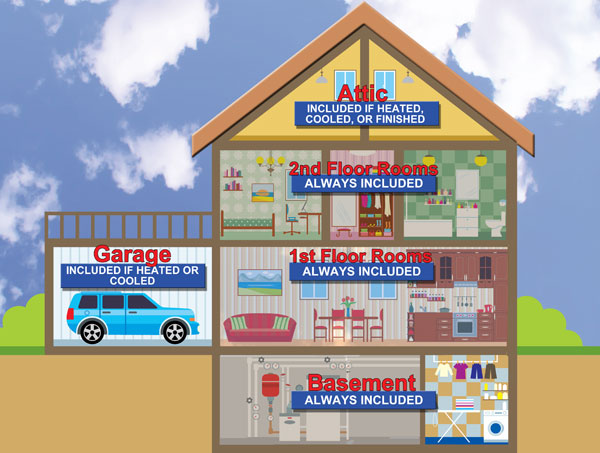

                                    Figure #  1
https://www.eia.gov/consumption/residential/reports/2009/methodology-square-footage.php

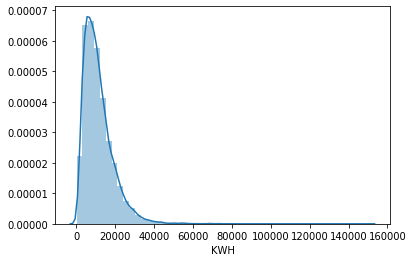

In [16]:
# Distribution of the target variable KWH 
# It shows that most of house's electricity consumption in this survey falls between 0 and 20000 KWH
# However the distribution has positive skewness with few samples that represent electricity consumption greater than 40000 KHW
sns.distplot(data_drop.KWH)

                        Figure # 2

In [17]:
# It is important to see the percentage of use of electricity vs all the other fuel options
def pie_graph(df,col):
    l=int(len(col)/2)
    fig=plt.figure(figsize=(15,35))
    grid=plt.GridSpec(l, 2)
    i=j=0
    for col in col_fuel:
        plt.subplot(grid[i, j])
        colors=sns.color_palette("Paired")
        pd.Series(df[col]).value_counts().plot(kind="pie",colors=colors,autopct='%.2f',
        labels=["Other energy", "Electricity"],explode=[0.09,0.09],fontsize=10,title="Percentage of use of Electricity-{}".format(col))
        i+=1
        if i>(l-1):
            i=0
            j=1

In [18]:
# Selecting columns that contain the word FUEL
col_fuel=data_drop.filter(regex ='FUEL').columns
for col in col_fuel:
    data_drop[(col)]=(data_drop[(col)]==5).astype(int)
    
fuel_type=data_drop.filter(regex ='FUEL')

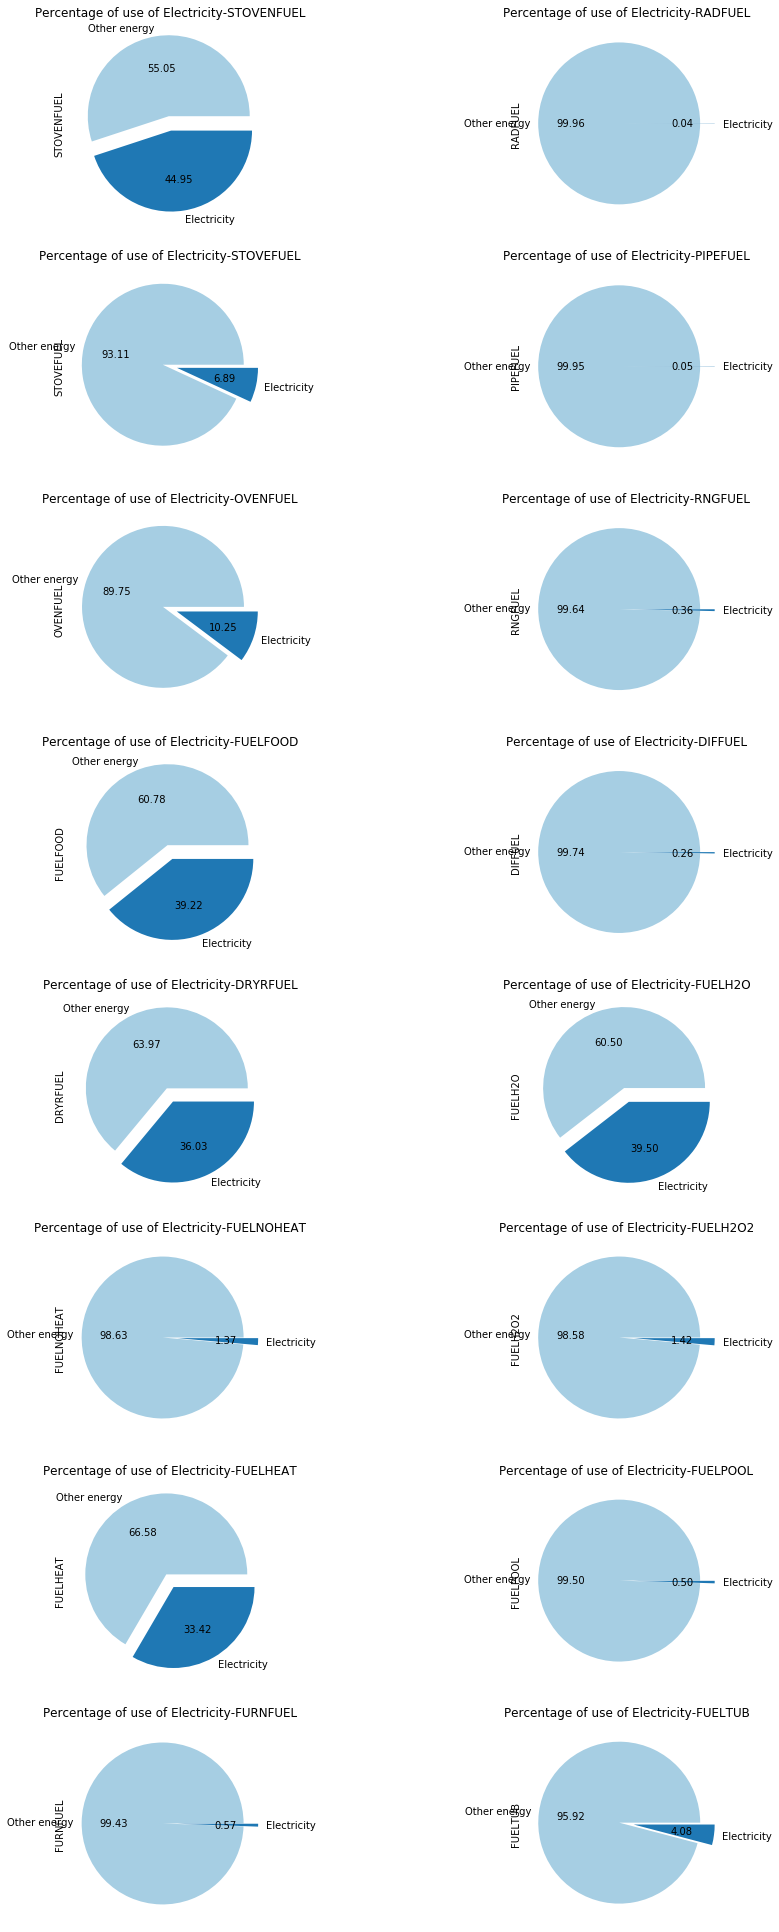

In [19]:
# Plotting percentage of electricity vs other energy options.
pie_graph(fuel_type, col_fuel)

                                                        Figure # 3
                            
Figure 3 shows that some independent variables (after cleaning) have less than 1% of the data related to the consumption of ELECTRICITY. These variables including 'FUELNOHEAT', 'FURNFUEL', 'RADFUEL', 'PIPEFUEL', 'RNGFUEL', 'DIFFUEL' and all the related independent variables will be dropped during the feature engineering step since no have a representative sample of data to predict the consumption of energy in KWH (ELECTRICITY).

#### Multicolinearity

Several columns (independent variables) out of 362 are correlated since they explain the same characteristics of the dataset.
This condition is denominated "Collinearity" and it is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset.

In the case of three or more varibles, this condition is denominated "Multicolinearity" and VIF is used to identify multicolinearity. The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression.


In Machine Learning using independent variables tha are highly correlated produce effects such as overfitting or high dimensionality of feature space that are translated in a reduction of overall performance. Multicollinearity also makes it difficult to ascertain how important a feature is to the target variable.

For this reason, it is important to verify if independent variables have a high correlation and based on that analysis select variables that better represent the characteristics of the data set


In [20]:
# Define TARGET VARIABLE ------> Energy consumption in KWH as they Y variable to predict
Y=data_drop["KWH"]
Y.head(5)

0    18466
1     5148
2     2218
3    10015
4     2869
Name: KWH, dtype: int64

In [21]:
#LOCATION
# Selecting variables that describe location
columns_location=["REGIONC", "DIVISION", "REPORTABLE_DOMAIN", "UR","KWH"]
data_location=data_drop[columns_location]

Another way to detect colineary between two variables is visually by plotting pairwise relationships in a dataset.
For instance, the figure below shows a high correlation between variables REGIONC and DIVISION as well as a high correlation between REGIONC - REPORTABLE_DOMAIN and DIVISION - REPORTABLE_DOMAIN. Therefore, only one variable can be selected in order to describe the same characteristic of the dataset.

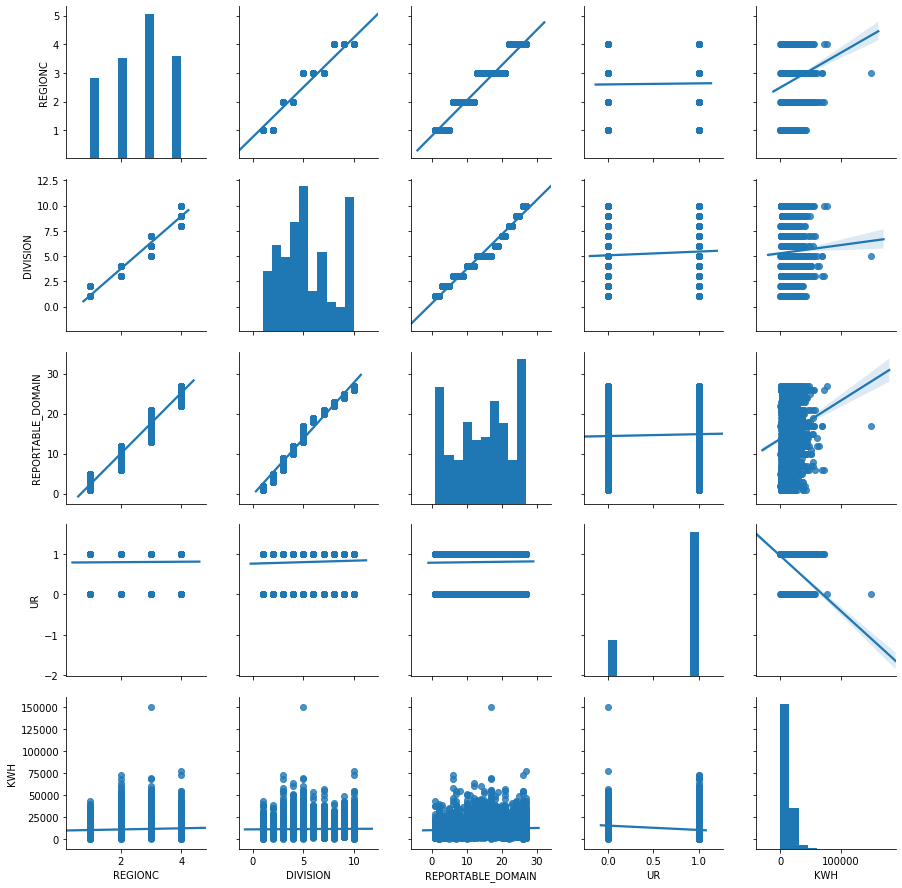

In [22]:
#Plot pairwise relationships in a dataset.
sns.pairplot(data_location, kind='reg')

                                           Figure # 4
                                           
Figure 4 shows that there is not a clear relationship between variables refering to location and consumption in KWH. Therefore, it can be decided not to include them as features.

The same analysis can be done for variables related to weather.

In [23]:
# Weather
columns_weather=["HDD65","CDD65","HDD30YR","CDD30YR", "Climate_Region_Pub", "AIA_Zone","KWH"]
df_weather=data_drop[columns_weather]

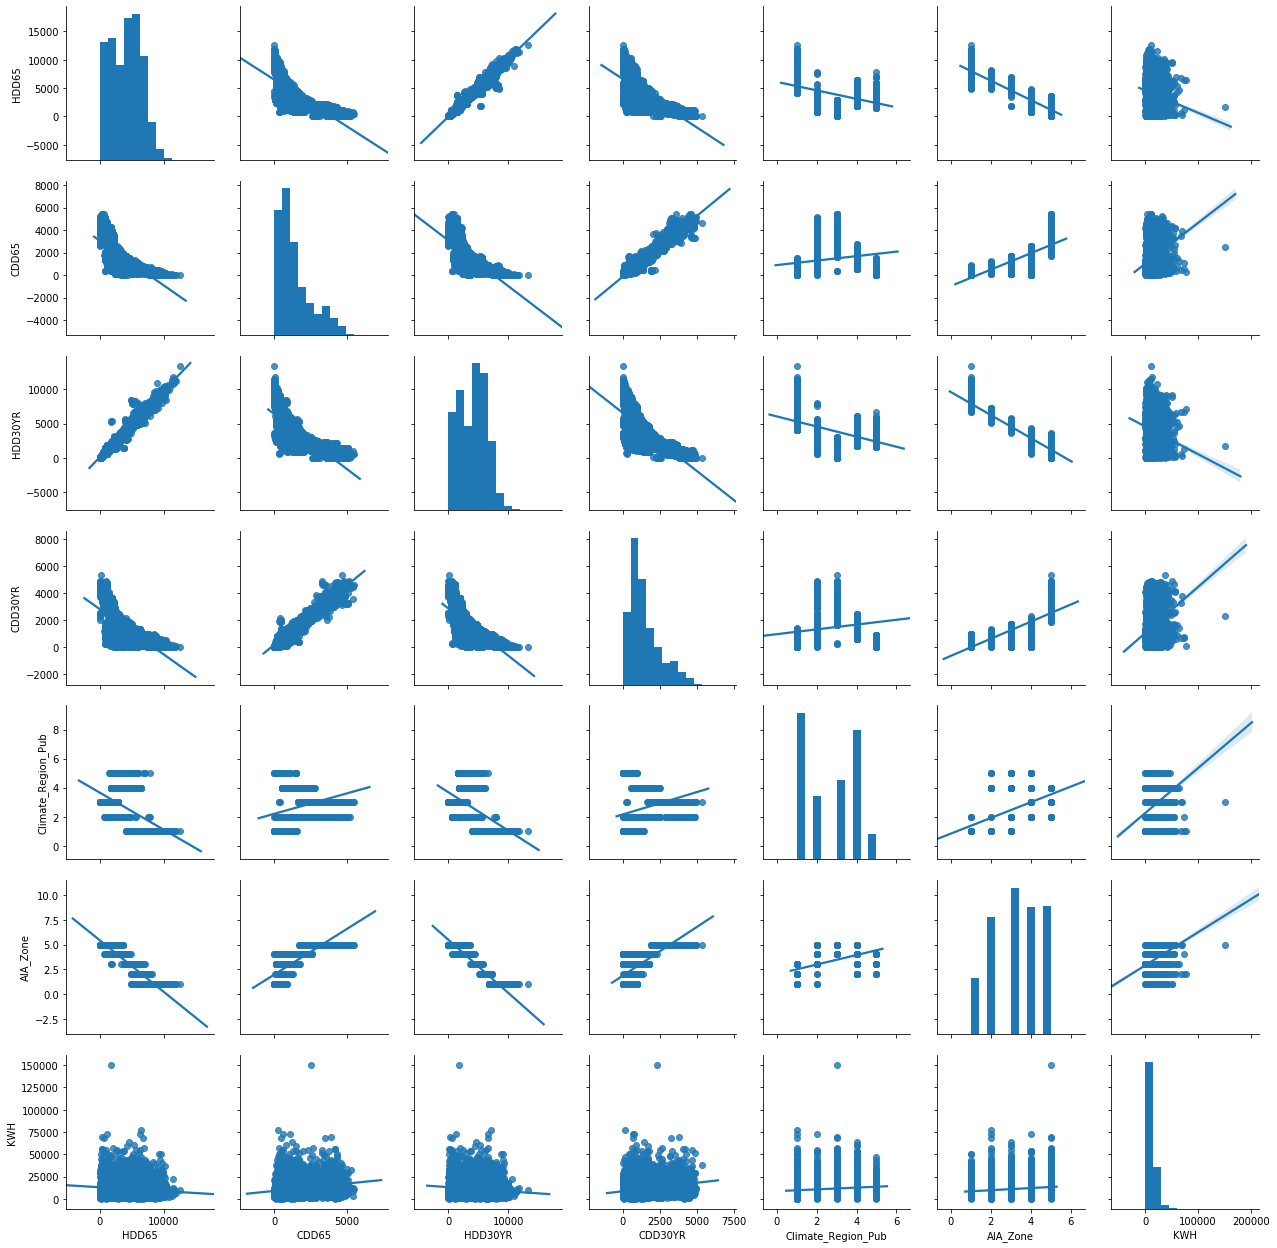

In [24]:
#Plot pairwise relationships in a dataset.
sns.pairplot(df_weather, kind='reg')

                                                Figure # 5

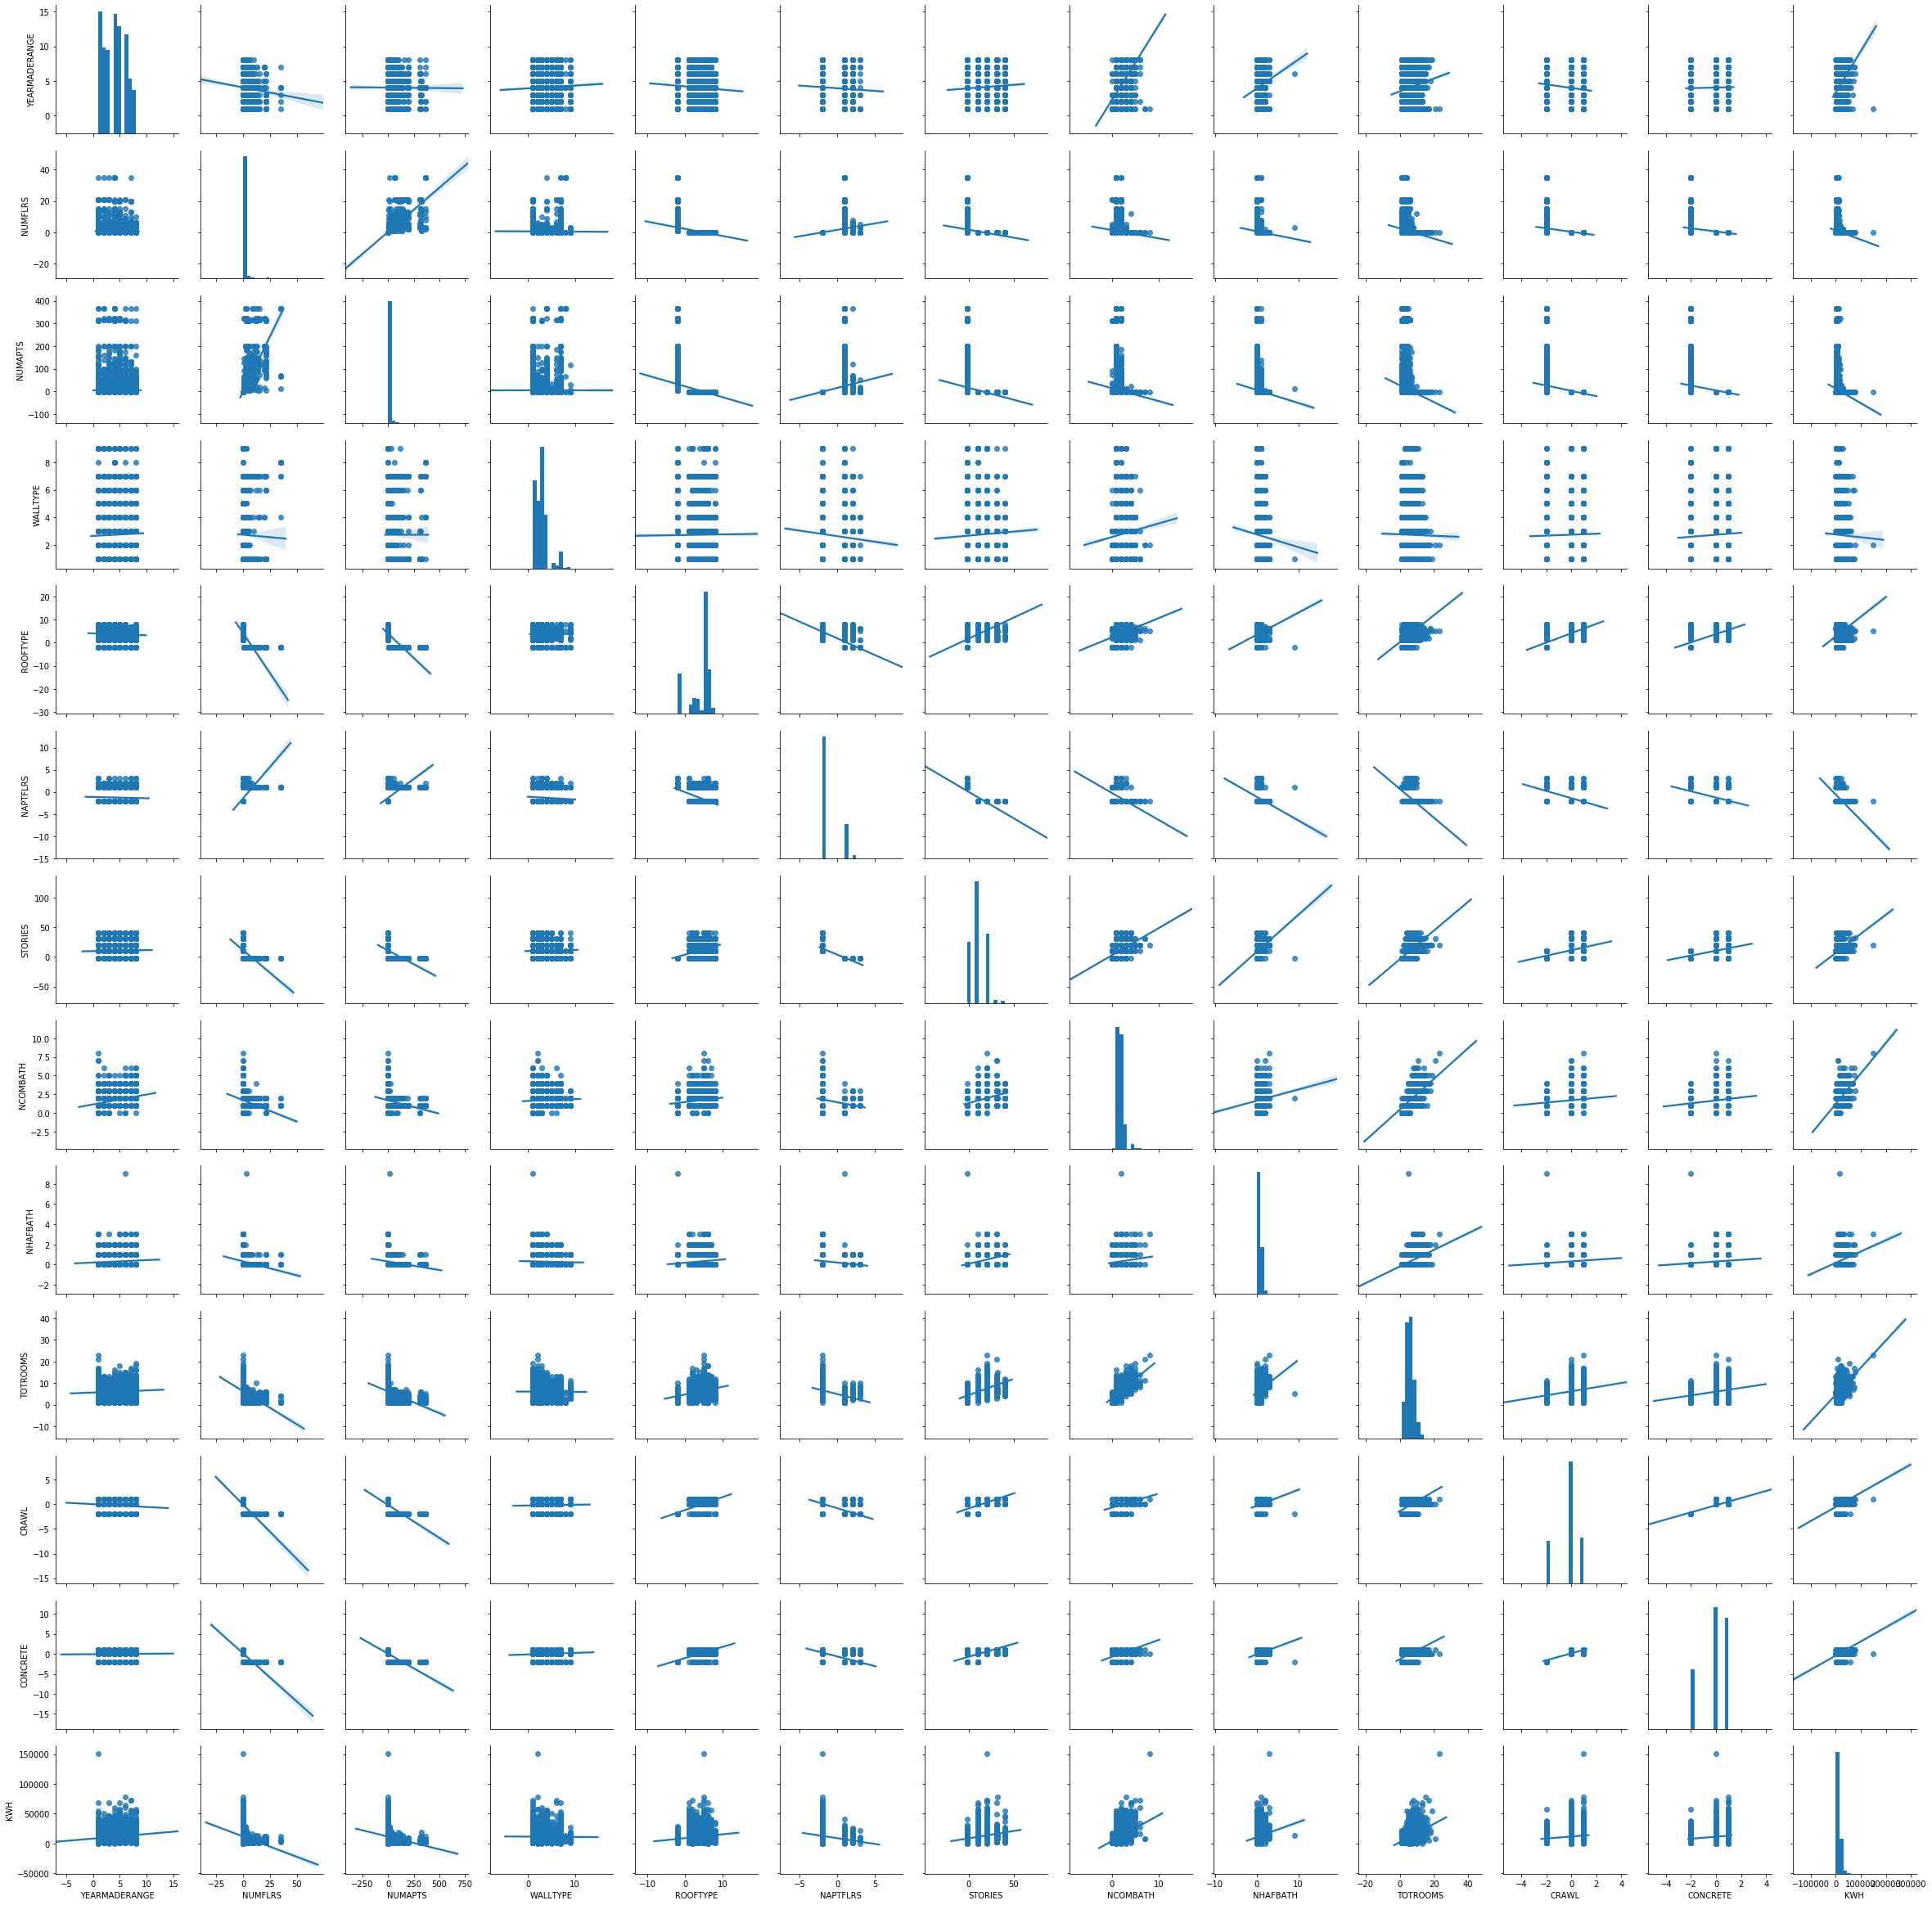

In [25]:
# TYPE OF HOUSE AND CHARACTERISTICS
columns_type_house=["YEARMADERANGE",
"NUMFLRS",
"NUMAPTS",
"WALLTYPE",
"ROOFTYPE",
"NAPTFLRS",
"STORIES",
"NCOMBATH",
"NHAFBATH",
"TOTROOMS",
"CRAWL",
"CONCRETE",
"KWH"]
df_house=data_drop[columns_type_house]
#Plot pairwise relationships in a dataset.
sns.pairplot(df_house, kind='reg')

                                                    Figure # 6

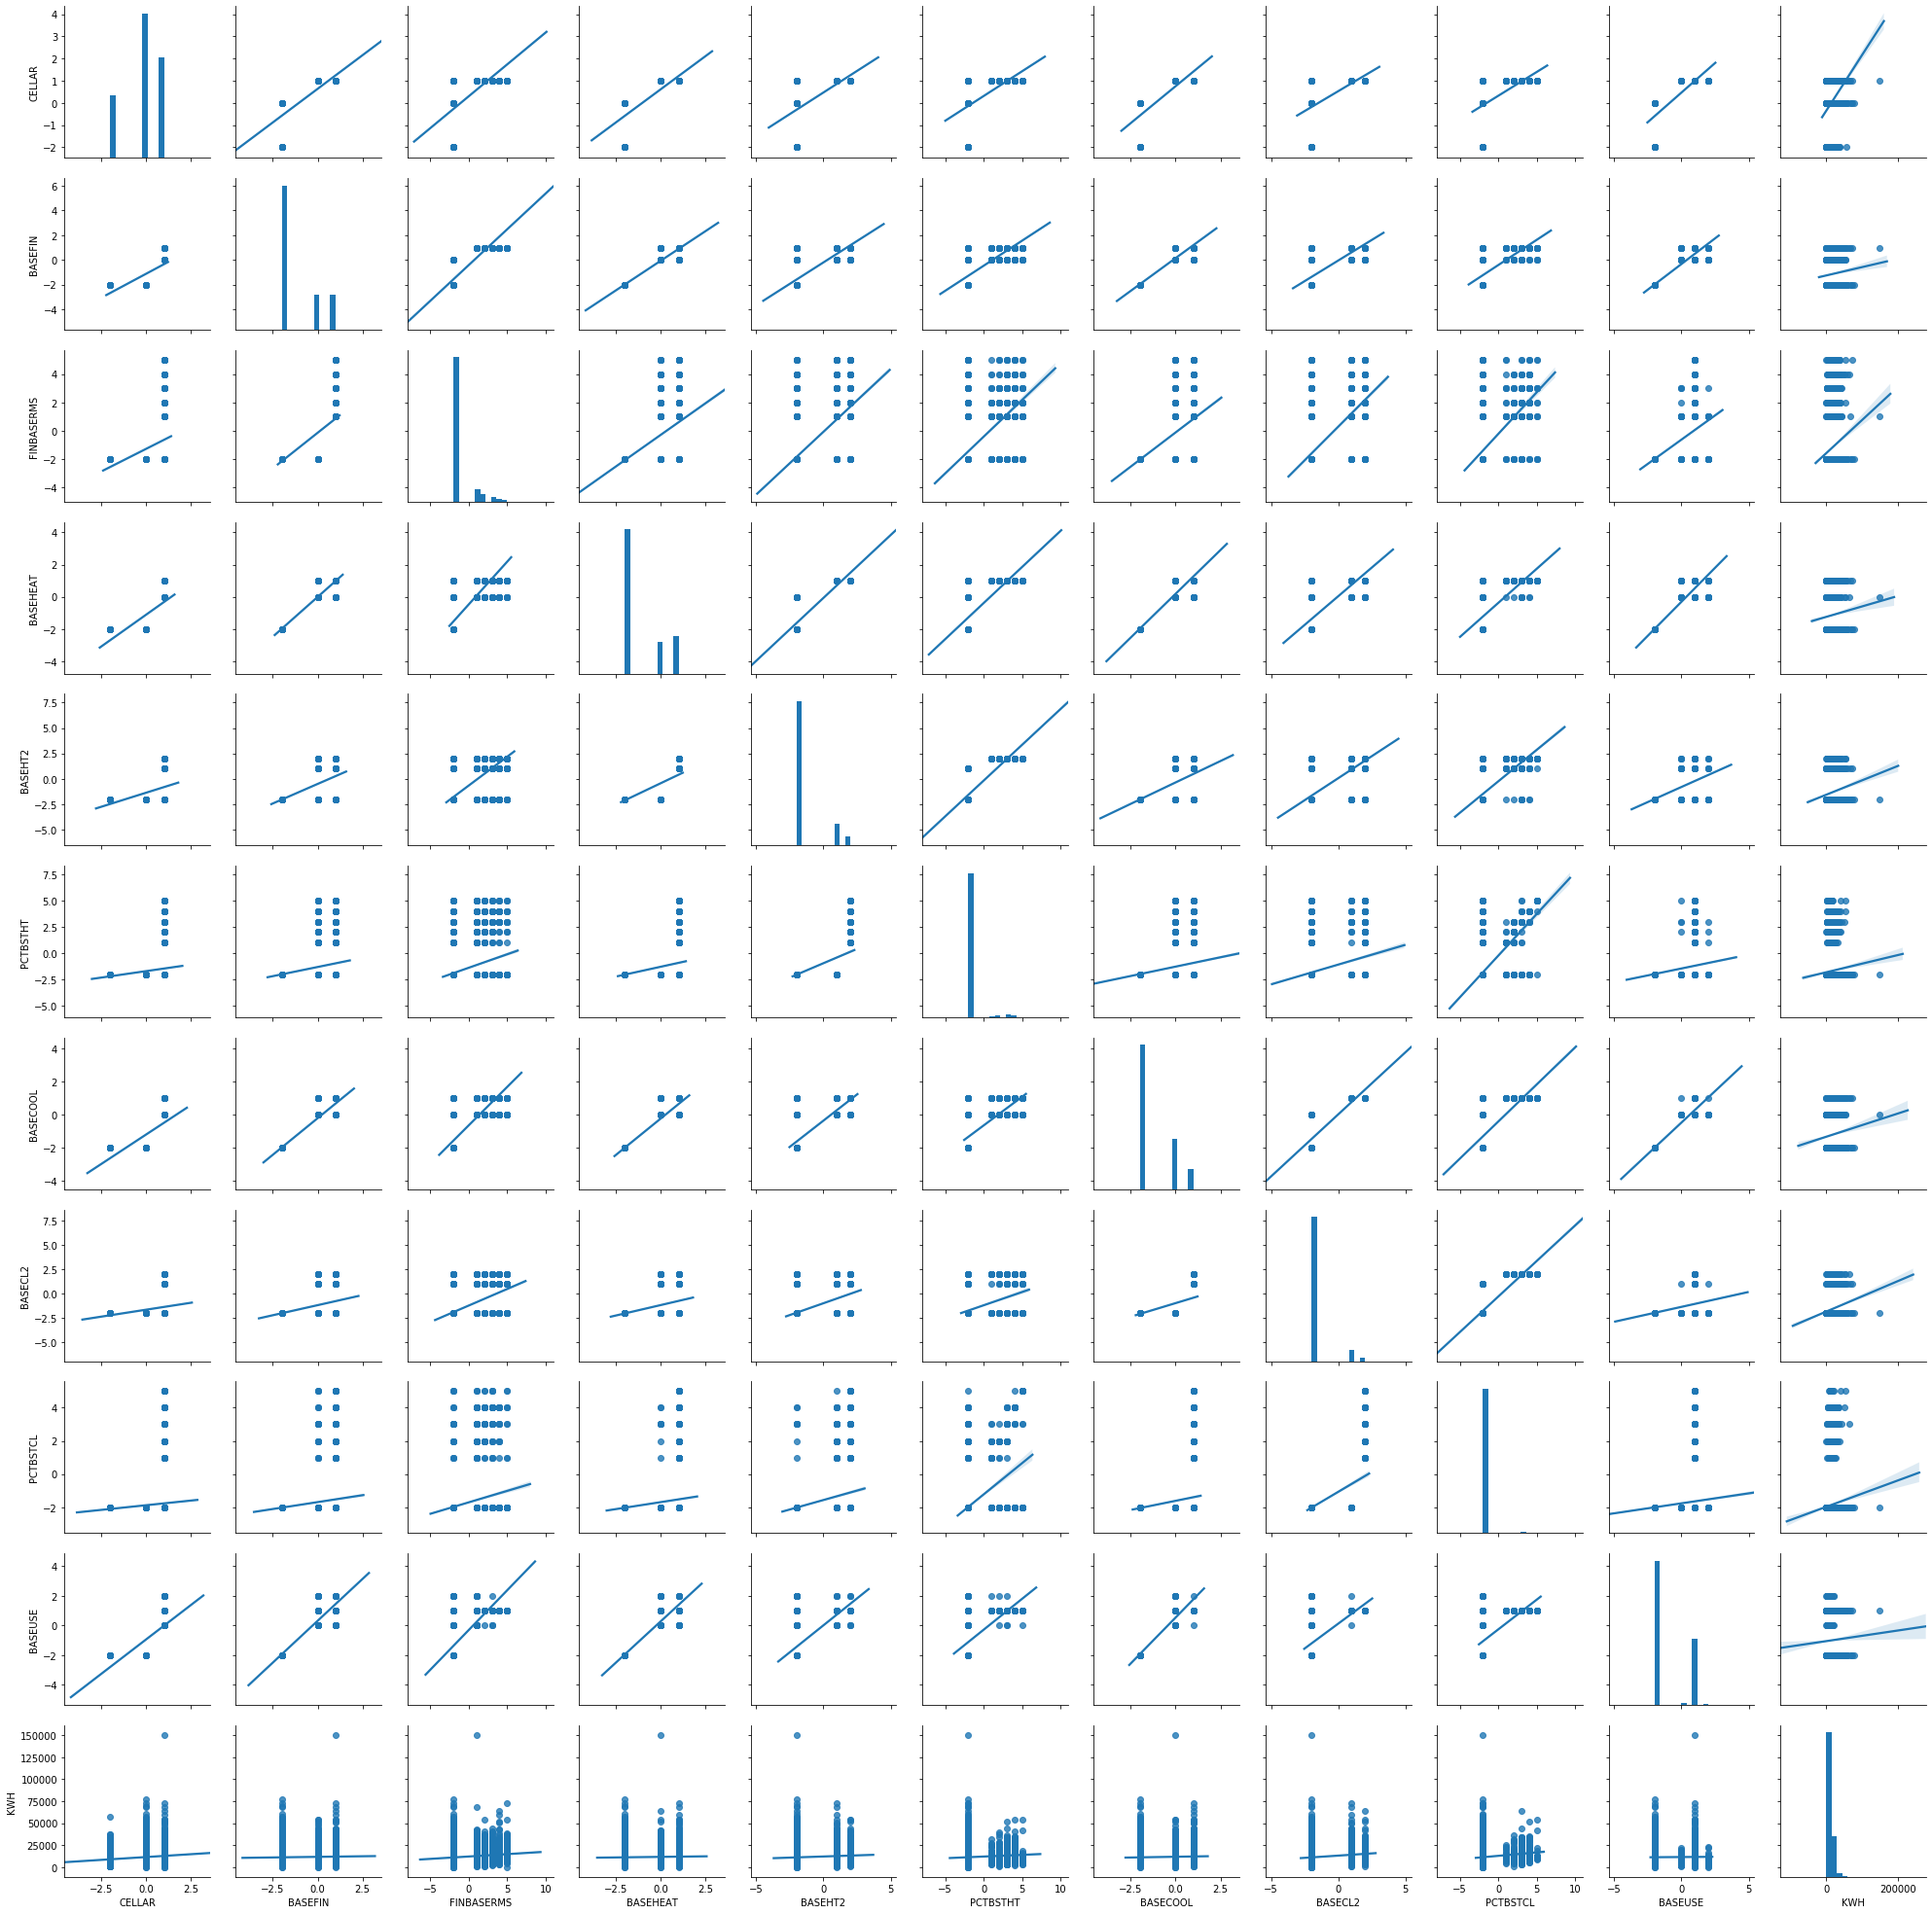

In [26]:
# BASEMENT
col_base=["CELLAR",
"BASEFIN",
"FINBASERMS",
"BASEHEAT",
"BASEHT2",
"PCTBSTHT",
"BASECOOL",
"BASECL2",
"PCTBSTCL",
"BASEUSE",
"KWH"]
df_base=data_drop[col_base]
sns.pairplot(df_base, kind='reg')

                                                    Figure # 7

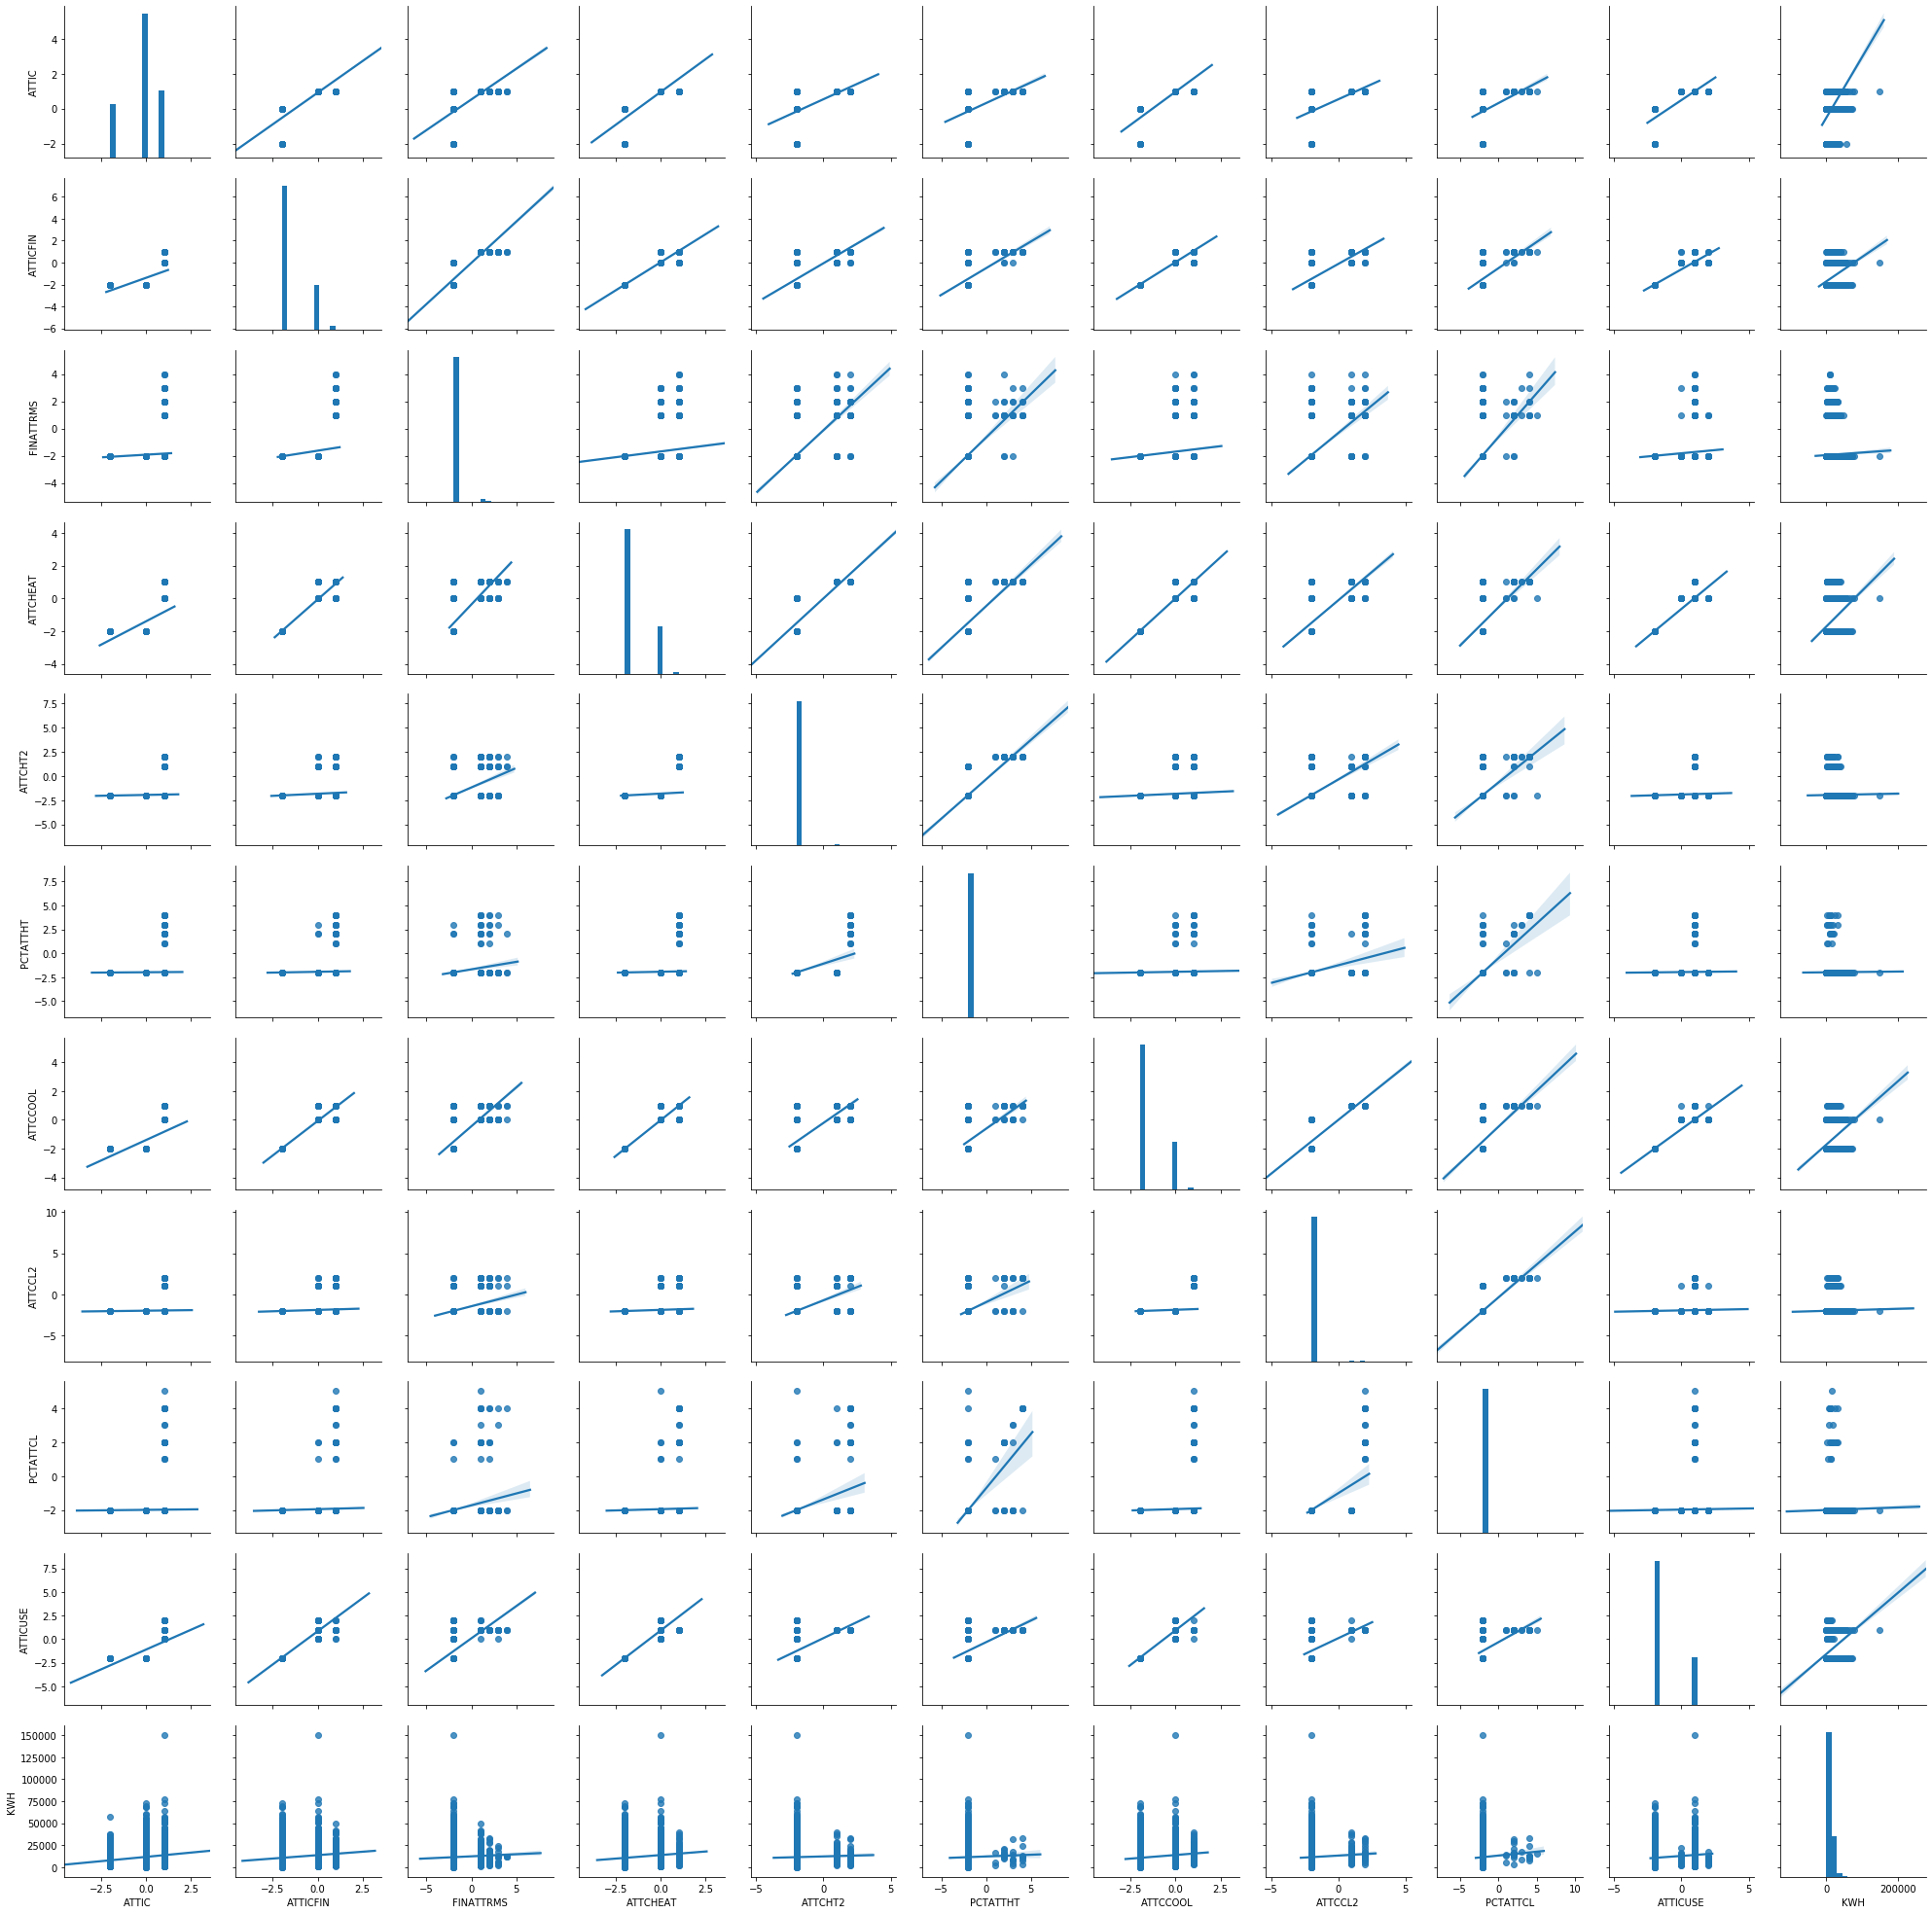

In [27]:
# ATTIC
col_attic=["ATTIC",
"ATTICFIN",
"FINATTRMS",
"ATTCHEAT",
"ATTCHT2",
"PCTATTHT",
"ATTCCOOL",
"ATTCCL2",
"PCTATTCL",
"ATTICUSE",
"KWH"]
df_attic=data_drop[col_attic]
sns.pairplot(df_attic, kind='reg')

                                                      Figure # 8

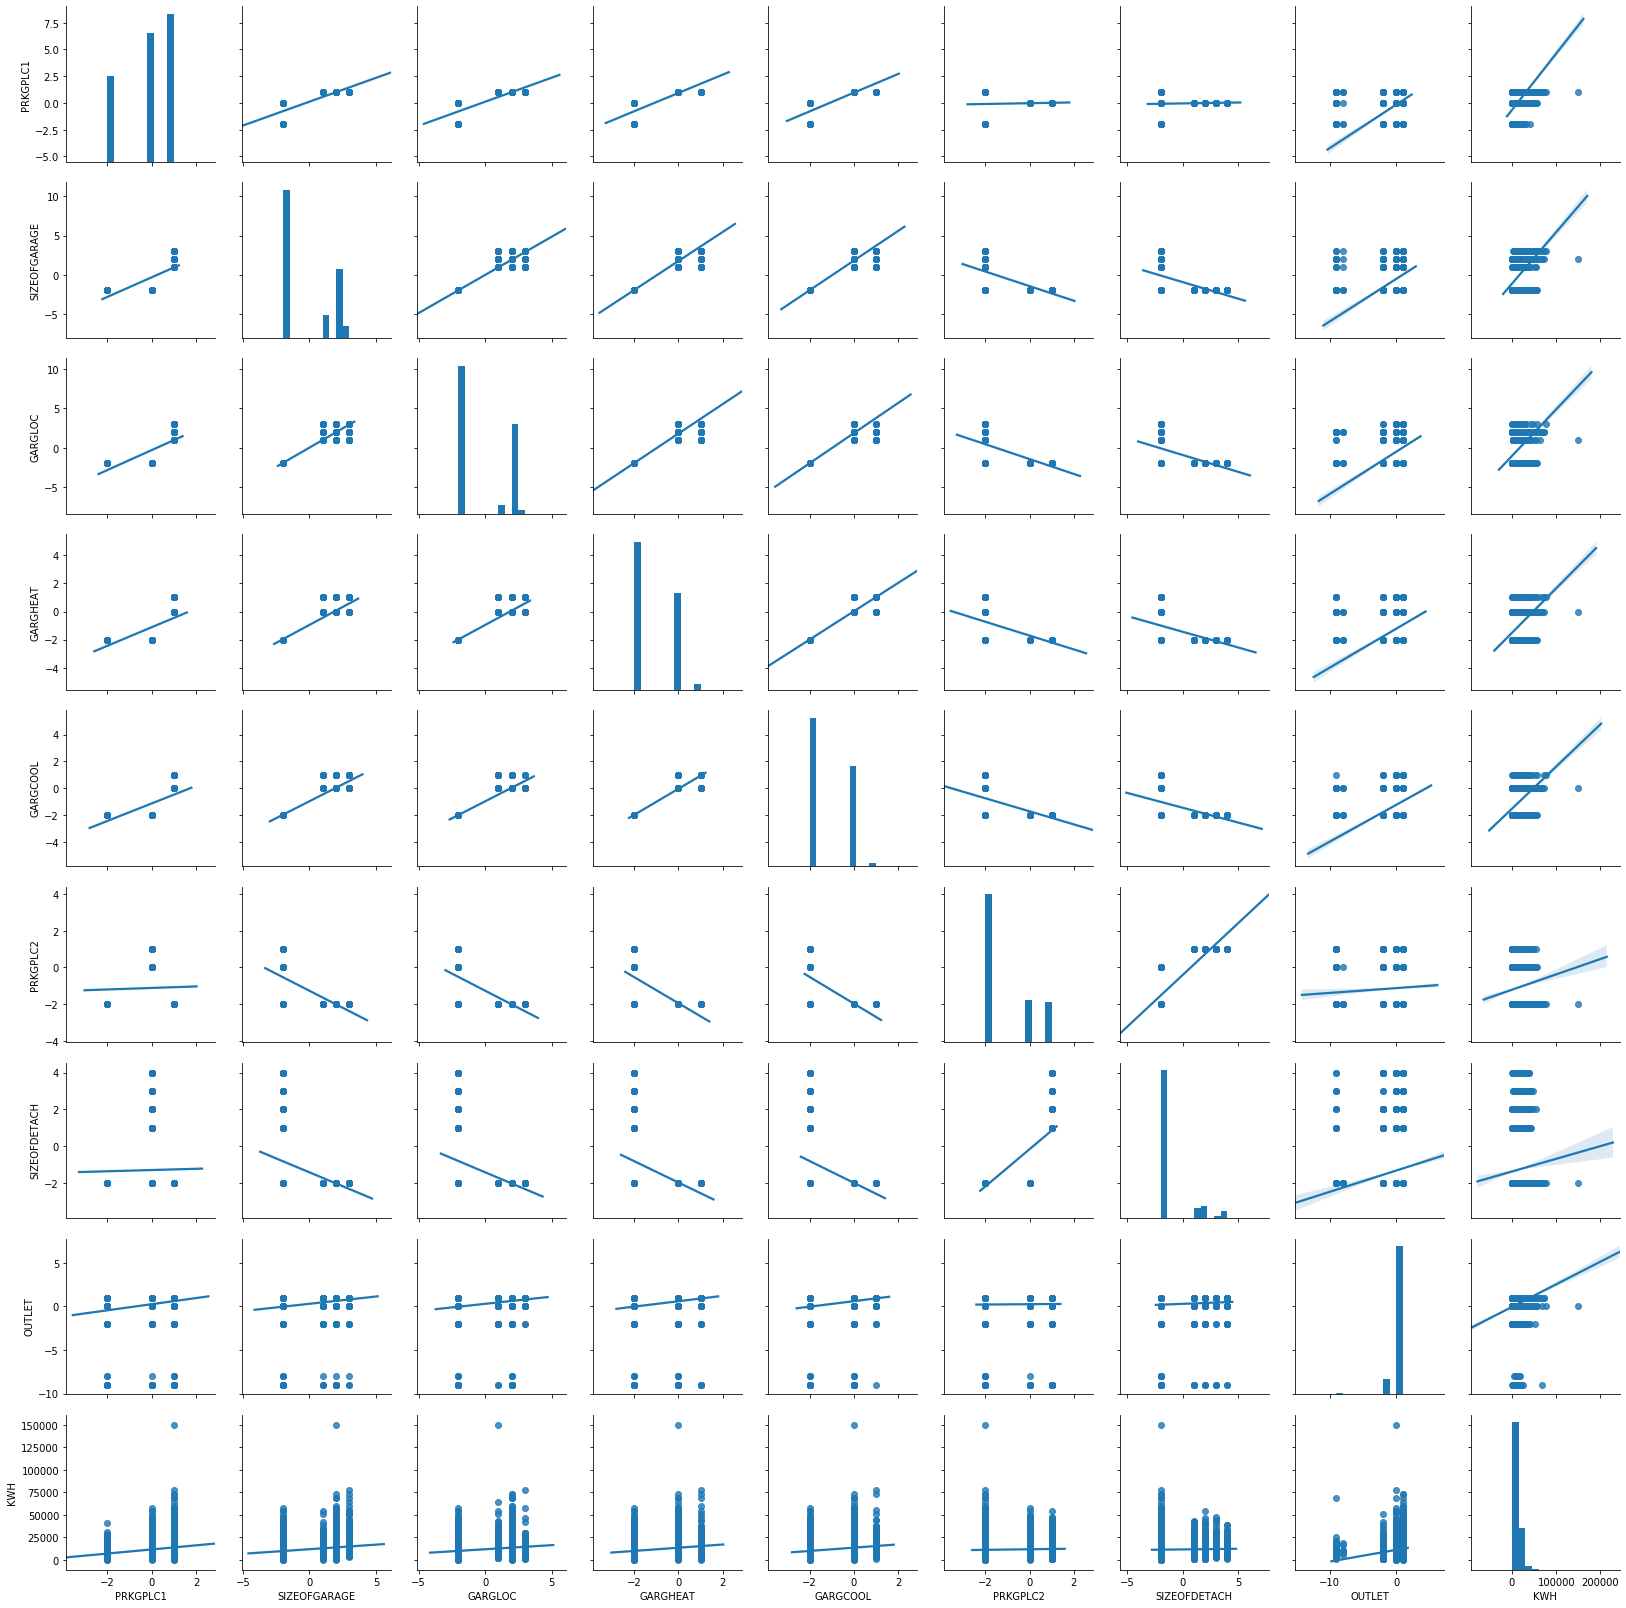

In [28]:
# GARAGE
col_garage=["PRKGPLC1",
"SIZEOFGARAGE",
"GARGLOC",
"GARGHEAT",
"GARGCOOL",
"PRKGPLC2",
"SIZEOFDETACH",
"OUTLET",
"KWH"]
df_garage=data_drop[col_garage]
sns.pairplot(df_garage, kind='reg')

                                                      Figure # 9

#### VIF
The idea is to get rid of the “redundant” variables by using a variable selection technique in this case VIF. VIF value can be interpreted as
        - 1 (Non-collinear)
        - 1–5 (Medium collinear)
        - >5 (Highly collinear)

Variables having a VIF value greater than 5 are removed in each group of variables.


In [29]:
# Libraries necessary for the code
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # values between 1 and 5 are "acceptablr".
        # Above 5 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    def calculate_vif(X, thresh=5.0):
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [30]:
# Applying the VIF analysis
transformer = ReduceVIF()
# LOCATION
df_location=data_location.drop(["KWH"], axis=1)
location = transformer.fit_transform(df_location[df_location.columns],Y)
location.head()

ReduceVIF fit
ReduceVIF transform
Dropping REPORTABLE_DOMAIN with vif=134.97148647193117
Dropping REGIONC with vif=43.42518455377098


C:\Users\davje\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,DIVISION,UR
0,4.0,1.0
1,10.0,1.0
2,1.0,1.0
3,3.0,1.0
4,1.0,1.0


All the varibales related to location are deleted since they are highly correlated and do not have present any relationship to the consumtion in KWH

In [31]:
# WEATHER
df_weather=df_weather.drop(["KWH"], axis=1)
weather = transformer.fit_transform(df_weather[df_weather.columns],Y)
weather.head()

ReduceVIF fit
ReduceVIF transform
Dropping HDD65 with vif=306.37412701614204
Dropping CDD65 with vif=71.61647296459945
Dropping AIA_Zone with vif=20.381229035881994


,HDD30YR,CDD30YR,Climate_Region_Pub
0,4953.0,1271.0,4.0
1,2688.0,143.0,5.0
2,5741.0,829.0,1.0
3,5781.0,868.0,1.0
4,5313.0,797.0,1.0


In [32]:
# TYPE OF HOUSE AND CHARACTERISTICS
df_house=df_house.drop(["KWH"], axis=1)
house = transformer.fit_transform(df_house[df_house.columns],Y)
house.head()

ReduceVIF fit
ReduceVIF transform
Dropping TOTROOMS with vif=16.319007586386505
Dropping NCOMBATH with vif=7.657131399756867
Dropping STORIES with vif=6.949426937877471
Dropping ROOFTYPE with vif=5.462123047740932


,YEARMADERANGE,NUMFLRS,NUMAPTS,WALLTYPE,NAPTFLRS,NHAFBATH,CRAWL,CONCRETE
0,7.0,0.0,-2.0,1.0,-2.0,2.0,0.0,0.0
1,6.0,0.0,-2.0,2.0,-2.0,1.0,0.0,0.0
2,3.0,2.0,8.0,1.0,1.0,0.0,-2.0,-2.0
3,5.0,0.0,-2.0,6.0,-2.0,1.0,1.0,0.0
4,5.0,0.0,-2.0,2.0,-2.0,1.0,0.0,0.0


In [33]:
# BASEMENT
df_base=df_base.drop(["KWH"], axis=1)
base=transformer.fit_transform(df_base[df_base.columns],Y)
base.head()

ReduceVIF fit
ReduceVIF transform
Dropping BASECOOL with vif=15613.05780979674
Dropping BASEHEAT with vif=569.528947964132
Dropping BASEFIN with vif=122.42032636656702
Dropping PCTBSTCL with vif=13.3045726041179
Dropping BASEHT2 with vif=8.475758892090852


,CELLAR,FINBASERMS,PCTBSTHT,BASECL2,BASEUSE
0,1.0,1.0,3.0,2.0,1.0
1,0.0,-2.0,-2.0,-2.0,-2.0
2,-2.0,-2.0,-2.0,-2.0,-2.0
3,0.0,-2.0,-2.0,-2.0,-2.0
4,1.0,-2.0,-2.0,-2.0,1.0


In [34]:
# ATTIC
df_attic=df_attic.drop(["KWH"], axis=1)

In [35]:
attic=transformer.fit_transform(df_attic[df_attic.columns],Y)
attic.head()

ReduceVIF fit
ReduceVIF transform
Dropping ATTCHEAT with vif=299555.7211229798
Dropping ATTCCOOL with vif=5441.141873256751
Dropping ATTICFIN with vif=1342.2251169075075
Dropping PCTATTCL with vif=222.61956662822817
Dropping ATTCHT2 with vif=124.10298007162086
Dropping ATTCCL2 with vif=62.8068100490226
Dropping FINATTRMS with vif=19.50080497355163


,ATTIC,PCTATTHT,ATTICUSE
0,0.0,-2.0,-2.0
1,0.0,-2.0,-2.0
2,-2.0,-2.0,-2.0
3,0.0,-2.0,-2.0
4,0.0,-2.0,-2.0


In [36]:
# GARAGE
df_garage=df_garage.drop(["KWH"], axis=1)

In [37]:
garage=transformer.fit_transform(df_garage[df_garage.columns],Y)
garage.head()

ReduceVIF fit
ReduceVIF transform
Dropping GARGCOOL with vif=169.0498939790992
Dropping GARGLOC with vif=60.662596973627174
Dropping SIZEOFGARAGE with vif=27.589292259088815


,PRKGPLC1,GARGHEAT,PRKGPLC2,SIZEOFDETACH,OUTLET
0,1.0,0.0,-2.0,-2.0,1.0
1,1.0,0.0,-2.0,-2.0,1.0
2,-2.0,-2.0,-2.0,-2.0,1.0
3,1.0,0.0,-2.0,-2.0,1.0
4,0.0,-2.0,1.0,1.0,0.0


In [38]:
# APPLIANCES
col_stove=["STOVEN",
"STOVENFUEL",
"STOVE",
"STOVEFUEL",
"OVEN",
"OVENFUEL",
"OVENUSE",
"OVENCLN",
"TYPECLN"]
df_stove=data_drop[col_stove]
stove=transformer.fit_transform(df_stove[df_stove.columns],Y)
stove.head()

ReduceVIF fit
ReduceVIF transform
Dropping OVENCLN with vif=24.59271502246158
Dropping OVEN with vif=6.390619653268079
Dropping STOVEN with vif=6.2025233038087135


,STOVENFUEL,STOVE,STOVEFUEL,OVENFUEL,OVENUSE,TYPECLN
0,1.0,0.0,0.0,0.0,3.0,1.0
1,0.0,0.0,0.0,0.0,4.0,2.0
2,0.0,0.0,0.0,0.0,3.0,2.0
3,0.0,1.0,1.0,1.0,4.0,2.0
4,1.0,0.0,0.0,0.0,4.0,-2.0


In [39]:
col_refrigerator=["NUMFRIG",
"TYPERFR1",
"SIZRFRI1",
"REFRIGT1",
"ICE",
"AGERFRI1",
"REPLCFRI",
"TYPERFR2",
"SIZRFRI2",
"REFRIGT2",
"MONRFRI2",
"AGERFRI2",
"TYPERFR3",
"SIZRFRI3",
"REFRIGT3",
"MONRFRI3",
"AGERFRI3",
"ESFRIG",
"ESFRIG2",
"ESFRIG3"]
df_ref=data_drop[col_refrigerator]
refrigerator=transformer.fit_transform(df_ref[df_ref.columns],Y)
refrigerator.head()

ReduceVIF fit
ReduceVIF transform
Dropping SIZRFRI3 with vif=248.3549621768129
Dropping REFRIGT3 with vif=123.25156861195194
Dropping NUMFRIG with vif=51.930965563686094
Dropping REFRIGT2 with vif=34.180553381684966
Dropping REFRIGT1 with vif=33.49285037738268
Dropping ESFRIG3 with vif=20.574333174753622
Dropping SIZRFRI2 with vif=18.148031169141316
Dropping SIZRFRI1 with vif=13.325491435554873


,TYPERFR1,ICE,AGERFRI1,REPLCFRI,TYPERFR2,MONRFRI2,AGERFRI2,TYPERFR3,MONRFRI3,AGERFRI3,ESFRIG,ESFRIG2
0,21.0,1.0,3.0,-2.0,21.0,12.0,3.0,-2.0,-2.0,-2.0,1.0,1.0
1,21.0,1.0,41.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
2,22.0,0.0,3.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,-2.0
3,22.0,0.0,2.0,1.0,22.0,12.0,5.0,-2.0,-2.0,-2.0,1.0,-2.0
4,22.0,0.0,2.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1.0,-2.0


In [40]:
col_freezer=["SEPFREEZ",
"NUMFREEZ",
"UPRTFRZR",
"SIZFREEZ",
"FREEZER",
"AGEFRZR",
"REPLCFRZ",
"UPRTFRZR2",
"SIZFREEZ2",
"FREEZER2",
"AGEFRZR2"
]
df_fre=data_drop[col_freezer]
freezer=transformer.fit_transform(df_fre[df_fre.columns],Y)
freezer.head()

ReduceVIF fit
ReduceVIF transform
Dropping FREEZER2 with vif=543.8198921581741
Dropping NUMFREEZ with vif=225.22047802158497
Dropping UPRTFRZR2 with vif=184.7535915189507
Dropping FREEZER with vif=34.784060750392875
Dropping UPRTFRZR with vif=19.28571010002332
Dropping SIZFREEZ2 with vif=14.822905020921871
Dropping SIZFREEZ with vif=7.0429271534678275


,SEPFREEZ,AGEFRZR,REPLCFRZ,AGEFRZR2
0,0.0,-2.0,-2.0,-2.0
1,0.0,-2.0,-2.0,-2.0
2,0.0,-2.0,-2.0,-2.0
3,0.0,-2.0,-2.0,-2.0
4,0.0,-2.0,-2.0,-2.0


In [41]:
col_wash=["DISHWASH",
"DWASHUSE",
"AGEDW",
"REPLCDW",
"CWASHER",
"TOPFRONT",
"WASHLOAD",
"WASHTEMP",
"RNSETEMP",
"AGECWASH"
]
df_wash=data_drop[col_wash]
wash=transformer.fit_transform(df_wash[df_wash.columns],Y)
wash.head()

ReduceVIF fit
ReduceVIF transform
Dropping RNSETEMP with vif=45.161932573159184
Dropping CWASHER with vif=20.306964143314612
Dropping WASHTEMP with vif=12.075094939891764
Dropping DISHWASH with vif=8.86649390273285
Dropping WASHLOAD with vif=7.764037080498582


,DWASHUSE,AGEDW,REPLCDW,TOPFRONT,AGECWASH
0,13.0,3.0,-2.0,2.0,2.0
1,-2.0,-2.0,-2.0,1.0,2.0
2,-2.0,-2.0,-2.0,-2.0,-2.0
3,20.0,2.0,1.0,1.0,1.0
4,30.0,2.0,1.0,1.0,2.0


In [42]:
col_dryer=["DRYRFUEL",
"DRYRUSE",
"AGECDRYER","KWH"]
df_dryer=data_drop[col_dryer]
dryer=transformer.fit_transform(df_dryer[df_dryer.columns],Y)
dryer.head()

ReduceVIF fit
ReduceVIF transform


,DRYRFUEL,DRYRUSE,AGECDRYER,KWH
0,1.0,1.0,1.0,18466.0
1,0.0,1.0,3.0,5148.0
2,0.0,-2.0,-2.0,2218.0
3,1.0,1.0,1.0,10015.0
4,1.0,1.0,2.0,2869.0


In [43]:
col_tv=["TVCOLOR",
"TVSIZE1",
"TVTYPE1",
"CABLESAT1",
"COMBODVR1",
"DVR1",
"DIGITSTB1",
"PLAYSTA1",
"COMBOVCRDVD1",
"VCR1",
"DVD1",
"TVAUDIOSYS1",
"OTHERSTB1",
"TVONWD1",
"TVONWDWATCH1",
"TVONWE1",
"TVONWEWATCH1",
"TVSIZE2",
"TVTYPE2",
"CABLESAT2",
"COMBODVR2",
"DVR2",
"DIGITSTB2",
"PLAYSTA2",
"COMBOVCRDVD2",
"VCR2",
"DVD2",
"TVAUDIOSYS2",
"OTHERSTB2",
"TVONWD2",
"TVONWDWATCH2",
"TVONWE2",
"TVONWEWATCH2",
"TVSIZE3",
"TVTYPE3",
"CABLESAT3",
"COMBODVR3",
"DVR3",
"DIGITSTB3",
"PLAYSTA3",
"COMBOVCRDVD3",
"VCR3",
"DVD3",
"TVAUDIOSYS3",
"OTHERSTB3",
"TVONWD3",
"TVONWDWATCH3",
"TVONWE3",
"TVONWEWATCH3"
]
df_tv=data_drop[col_tv]
tv=transformer.fit_transform(df_tv[df_tv.columns],Y)
tv.head()

ReduceVIF fit
ReduceVIF transform
Dropping OTHERSTB3 with vif=332.7355129058896
Dropping PLAYSTA3 with vif=203.32196488019216
Dropping TVAUDIOSYS3 with vif=120.76865233888927
Dropping PLAYSTA2 with vif=65.91792672061698
Dropping CABLESAT3 with vif=60.584778496545184
Dropping OTHERSTB2 with vif=49.02271671395147
Dropping DIGITSTB3 with vif=46.63752071473458
Dropping VCR3 with vif=42.465497562083094
Dropping TVONWEWATCH3 with vif=41.896956805931374
Dropping COMBOVCRDVD3 with vif=36.637833085080466
Dropping CABLESAT2 with vif=35.38784776246799
Dropping TVONWEWATCH2 with vif=26.613380679024438
Dropping TVONWD3 with vif=26.607718479447026
Dropping DVD3 with vif=22.683826009179484
Dropping TVAUDIOSYS2 with vif=22.386155509640055
Dropping TVONWE1 with vif=21.422427416861535
Dropping TVSIZE1 with vif=19.31362253148165
Dropping TVSIZE3 with vif=17.471530556751627
Dropping TVONWD2 with vif=16.839027616204426
Dropping TVONWDWATCH1 with vif=14.035108174262094
Dropping TVCOLOR with vif=12.517542957

,TVTYPE1,COMBODVR1,DVR1,DIGITSTB1,COMBOVCRDVD1,VCR1,DVD1,TVAUDIOSYS1,OTHERSTB1,TVONWEWATCH1,COMBODVR2,DVR2,DVD2,TVONWDWATCH2,TVONWE2,TVONWDWATCH3,TVONWE3
0,2.0,1.0,-2.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,-2.0,0.0,-2.0,2.0,-2.0,2.0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,-2.0,2.0,-2.0,-2.0
2,1.0,-2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-2.0,0.0,0.0,0.0,-2.0,3.0,-2.0,2.0
4,2.0,1.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.0,1.0,-2.0,0.0,-2.0,1.0,-2.0,-2.0


In [44]:
col_pc=["NUMPC",
"PCTYPE1",
"MONITOR1",
"TIMEON1",
"PCONOFF1",
"PCSLEEP1",
"PCTYPE2",
"MONITOR2",
"TIMEON2",
"PCONOFF2",
"PCSLEEP2",
"PCTYPE3",
"MONITOR3",
"TIMEON3",
"PCONOFF3",
"PCSLEEP3"
]
df_pc=data_drop[col_pc]
pc=transformer.fit_transform(df_pc[df_pc.columns],Y)
pc.head()

ReduceVIF fit
ReduceVIF transform
Dropping PCONOFF3 with vif=1461.6172471998539
Dropping PCONOFF2 with vif=475.8938671587278
Dropping PCTYPE1 with vif=125.05897475838424
Dropping TIMEON3 with vif=26.912843715199624
Dropping PCSLEEP3 with vif=15.744491192774772
Dropping TIMEON2 with vif=11.96752074665051
Dropping MONITOR3 with vif=9.358401162991655
Dropping TIMEON1 with vif=6.930584877121175
Dropping PCSLEEP2 with vif=5.8011256160051845


,NUMPC,MONITOR1,PCONOFF1,PCSLEEP1,PCTYPE2,MONITOR2,PCTYPE3
0,2.0,1.0,0.0,1.0,1.0,1.0,-2.0
1,2.0,1.0,1.0,-2.0,2.0,-2.0,-2.0
2,1.0,1.0,1.0,-2.0,-2.0,-2.0,-2.0
3,2.0,1.0,0.0,1.0,2.0,-2.0,-2.0
4,2.0,1.0,1.0,-2.0,2.0,-2.0,-2.0


In [45]:
col_others_app=["MICRO",
"AMTMICRO",
"DEFROST",
"TOPGRILL",
"STGRILA",
"TOASTER",
"COFFEE",
"PCPRINT",
"FAX",
"COPIER"                          
]
df_app=data_drop[col_others_app]
other_app=transformer.fit_transform(df_app[df_app.columns],Y)
other_app.head()

ReduceVIF fit
ReduceVIF transform
Dropping MICRO with vif=30.18321742505803
Dropping STGRILA with vif=5.486991358244475


,AMTMICRO,DEFROST,TOPGRILL,TOASTER,COFFEE,PCPRINT,FAX,COPIER
0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [46]:
# HEATING AND COOLING
col_pump=["WELLPUMP",
"DIPSTICK",
"SWAMPCOL",
"AQUARIUM",
"STEREO",
"NOCORD",
"ANSMACH",
"BATTOOLS",
"BATCHRG",
"CHRGPLGT",
"ELECDEV",
"ELECCHRG",
"CHRGPLGE"]
df_pump=data_drop[col_pump]
pump=transformer.fit_transform(df_pump[df_pump.columns],Y)
pump.head()

ReduceVIF fit
ReduceVIF transform
Dropping ELECCHRG with vif=7.147675032880789
Dropping BATCHRG with vif=6.552777187596156
Dropping ELECDEV with vif=5.035901695653568


,WELLPUMP,DIPSTICK,SWAMPCOL,AQUARIUM,STEREO,NOCORD,ANSMACH,BATTOOLS,CHRGPLGT,CHRGPLGE
0,0.0,-2.0,-2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0
2,-2.0,-2.0,-2.0,0.0,1.0,1.0,1.0,0.0,-2.0,0.0
3,0.0,-2.0,-2.0,0.0,1.0,1.0,1.0,0.0,-2.0,1.0
4,0.0,-2.0,-2.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0


In [47]:
col_heat=["EQUIPM",
"FUELHEAT",
"EQUIPAGE",
"EQMAMT",
"HEATROOM",
"KWH"
]
df_heat=data_drop[col_heat]
heat=transformer.fit_transform(df_heat[df_heat.columns],Y)
heat.head()

ReduceVIF fit
ReduceVIF transform


,EQUIPM,FUELHEAT,EQUIPAGE,EQMAMT,HEATROOM,KWH
0,3.0,1.0,3.0,-2.0,9.0,18466.0
1,3.0,0.0,41.0,1.0,4.0,5148.0
2,2.0,0.0,2.0,-2.0,2.0,2218.0
3,3.0,0.0,3.0,-2.0,7.0,10015.0
4,3.0,0.0,1.0,-2.0,5.0,2869.0


In [48]:
col_humi=["MOISTURE",
"USEMOISTURE"]
df_hum=data_drop[col_humi]
humd=transformer.fit_transform(df_hum[df_hum.columns],Y)
humd.head()

ReduceVIF fit
ReduceVIF transform


,MOISTURE,USEMOISTURE
0,0.0,-2.0
1,0.0,-2.0
2,0.0,-2.0
3,1.0,5.0
4,0.0,-2.0


In [49]:
col_water=["NUMH2ONOTNK",
"NUMH2OHTRS",
"H2OTYPE1",
"FUELH2O",
"WHEATOTH",
"WHEATSIZ",
"WHEATAGE",
"WHEATBKT",
"H2OTYPE2",
"FUELH2O2",
"WHEATSIZ2",
"WHEATAGE2"]
df_water=data_drop[col_water]
water=transformer.fit_transform(df_water[df_water.columns],Y)
water.head()

ReduceVIF fit
ReduceVIF transform
Dropping H2OTYPE2 with vif=88.71055684491598
Dropping H2OTYPE1 with vif=41.57461004258032
Dropping NUMH2OHTRS with vif=13.53511461368298
Dropping WHEATSIZ2 with vif=8.40914020097111


,NUMH2ONOTNK,FUELH2O,WHEATOTH,WHEATSIZ,WHEATAGE,WHEATBKT,FUELH2O2,WHEATAGE2
0,0.0,1.0,0.0,3.0,3.0,0.0,0.0,-2.0
1,0.0,0.0,0.0,3.0,41.0,0.0,0.0,-2.0
2,0.0,0.0,1.0,3.0,5.0,0.0,0.0,-2.0
3,0.0,1.0,0.0,3.0,2.0,0.0,0.0,-2.0
4,0.0,0.0,0.0,2.0,3.0,0.0,0.0,-2.0


In [50]:
col_ac=["AIRCOND",
"COOLTYPE",
"ACROOMS",
"USECENAC",
"NUMBERAC",
"USEWWAC",
"NUMCFAN",
"USECFAN"]
df_ac=data_drop[col_ac]
ac=transformer.fit_transform(df_ac[df_ac.columns],Y)
ac.head()

ReduceVIF fit
ReduceVIF transform
Dropping COOLTYPE with vif=31.974422445183237
Dropping USEWWAC with vif=12.289385868290053
Dropping ACROOMS with vif=8.544841252721362


,AIRCOND,USECENAC,NUMBERAC,NUMCFAN,USECFAN
0,1.0,3.0,-2.0,3.0,3.0
1,1.0,1.0,-2.0,0.0,-2.0
2,1.0,-2.0,1.0,1.0,2.0
3,1.0,3.0,-2.0,1.0,1.0
4,0.0,-2.0,-2.0,0.0,-2.0


In [51]:
col_deshumi=["NOTMOIST",
"USENOTMOIST"]
df_desh=data_drop[col_deshumi]
desh=transformer.fit_transform(df_desh[df_desh.columns],Y)
desh.head()

ReduceVIF fit
ReduceVIF transform


,NOTMOIST,USENOTMOIST
0,0.0,-2.0
1,0.0,-2.0
2,0.0,-2.0
3,0.0,-2.0
4,0.0,-2.0


In [52]:
# SWIMMING POOL
col_pool=["SWIMPOOL",
"POOL",
"FUELPOOL",
"RECBATH",
"FUELTUB"]
df_pool=data_drop[col_pool]
pool=transformer.fit_transform(df_pool[df_pool.columns],Y)
pool.head()

ReduceVIF fit
ReduceVIF transform


,SWIMPOOL,POOL,FUELPOOL,RECBATH,FUELTUB
0,0.0,-2.0,0.0,0.0,0.0
1,0.0,-2.0,0.0,0.0,0.0
2,-2.0,-2.0,0.0,0.0,0.0
3,0.0,-2.0,0.0,0.0,0.0
4,0.0,-2.0,0.0,0.0,0.0


In [53]:
# LIGHTS
col_lights=["LGT12",
"LGT12EE",
"LGT4",
"LGT4EE",
"LGT1",
"LGT1EE",
"NOUTLGTNT",
"LGTOEE",
"NGASLIGHT"]
df_lights=data_drop[col_lights]
lights=transformer.fit_transform(df_lights[df_lights.columns],Y)
lights.head()

ReduceVIF fit
ReduceVIF transform
Dropping NGASLIGHT with vif=7.5928877098234855


,LGT12,LGT12EE,LGT4,LGT4EE,LGT1,LGT1EE,NOUTLGTNT,LGTOEE
0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,-2.0
1,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0
2,0.0,-2.0,2.0,2.0,2.0,2.0,-2.0,-2.0
3,0.0,-2.0,1.0,0.0,0.0,-2.0,0.0,-2.0
4,0.0,-2.0,0.0,-2.0,2.0,2.0,0.0,-2.0


## Feature Engineering 
Based on the analysis and exploration of the dataset and using the information about multicolinearity of variables by groups the following actions were taken:
1. A detailed analysis of the dataset suggested dropping out another group of variables since do not add any information to the final prediction.
2. I decided to group variables into LOCATION, WEATHER, BASEMENT, GARAGE, APPLIANCES, HEATING, COOLING, SWIMMING POOL, AND LIGHTS.
3. According to pie charts (Figure 3) the folowing variables 'FUELNOHEAT', 'FURNFUEL', 'RADFUEL', 'PIPEFUEL', 'RNGFUEL', 'DIFFUEL' and all the related independent variables are dropped since they 99% of the fuel used in those variables comes from OTHER SOURCES such as gas, wood, solar. etc. and they do not use ELECTRICITY.
4. LOCATION is NOT considered in this project since figure 4 shows that there is not a relationship with ELECTRICITY CONSUMPTION.

In [54]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 322 entries, REGIONC to KWHOTH
dtypes: float64(5), int32(17), int64(300)
memory usage: 28.9 MB


In [55]:
# Drop columns that do not add information to predict the consumption in KWH
#Second addition of variables (columns) to drop after exploratory analysis and further analysis of the dataset
col_drop2=["ESDISHW",
"ESCWASH",
"ESWWAC",
"REPLCCW",
"COMPUTER",# Yes-no question pc
"INTERNET",# Internet related questions
"INDIALUP",
"INDSL",
"INCABLE",
"INSATEL",
"INWIRELESS",
"HEATHOME", # Heat yes no questions regarding installation of the equipment
"DNTHEAT",
"EQUIPNOHEAT",
"REPLCHT",
"CARRYEL",# Portable heater
"RANGE",
"DIFEQUIP",
"THERMAIN", # Thermostate
"NUMTHERM",
"PROTHERM",
"AUTOHEATNITE",
"AUTOHEATDAY",
"TEMPHOME",
"TEMPGONE",
"TEMPNITE",
"DNTAC", # AIR CONDITIONING installation related questions
"COOLTYPENOAC",
"DUCTS",
"CENACHP",
"ACOTHERS",
"MAINTAC",
"AGECENAC",
"REPLCCAC",
"THERMAINAC",
"PROTHERMAC",
"AUTOCOOLNITE",
"AUTOCOOLDAY",
"TEMPHOMEAC",
"TEMPGONEAC",
"TEMPNITEAC",
"WWACAGE",
"ESWWAC",
"REPLCWWAC",
"TREESHAD",
"HIGHCEIL",
"CATHCEIL",
"INSTLCFL", # Energy efficiency bull Lights
"SLDDRS",  # Othet information irrelevant
"DOOR1SUM",
"WINDOWS",
"TYPEGLASS",
"NEWGLASS",
"ADQINSUL",
"INSTLINS",
"DRAFTY",
"INSTLWS",
"AGEWS",
"AUDIT",
"AGEAUD",
"FUELNOHEAT", # OTHER TYPE OF FUEL DIFFERENT THAN ELECTRICITY
"RNGFUEL",
"DIFFUEL", 
"HEATOTH",
"EQUIPAUX",
"REVERSE",
"WARMAIR",
"FURNFUEL",
"STEAMR",
"RADFUEL",
"PERMELEC",
"PIPELESS",
"PIPEFUEL"]

In [56]:
data_clean=data_drop.drop(columns=col_drop2)
# Dropping gropu LOCATION
col_location=["REGIONC", "DIVISION", "REPORTABLE_DOMAIN", "UR"]
data_clean=data_clean.drop(columns=col_location)

In [57]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 246 entries, TYPEHUQ to KWHOTH
dtypes: float64(5), int32(10), int64(231)
memory usage: 22.2 MB


### Selected variables

In [58]:
selected_col=["TYPEHUQ",
"HDD65",
"CDD65",
"AIA_Zone",
"TOTROOMS",
"STOVENFUEL",
"STOVEFUEL",
"OVENFUEL",
"OVENUSE",
"MICRO",
"NUMMEAL",
"COFFEE",
"NUMFRIG",
"SIZRFRI1",
"ICE",
"ESFRIG",
"SIZRFRI2",
"ESFRIG2",
"SIZRFRI3",
"ESFRIG3",
"NUMFREEZ",
"SIZFREEZ",
"FREEZER",
"SIZFREEZ2",
"FREEZER2",
"DISHWASH",
"DWASHUSE",
"CWASHER",
"WASHLOAD",
"RNSETEMP",
"DRYER",
"DRYRFUEL",
"TVCOLOR",
"TVSIZE1",
"CABLESAT1",
"COMBODVR1",
"DVR1",
"PLAYSTA1",
"TVAUDIOSYS1",
"OTHERSTB1",
"TVONWD1",
"TVONWE1",
"TVSIZE2",
"CABLESAT2",
"COMBODVR2",
"DVR2",
"PLAYSTA2",
"TVAUDIOSYS2",
"OTHERSTB2",
"TVONWD2",
"TVONWE2",
"TVSIZE3",
"CABLESAT3",
"COMBODVR3",
"DVR3",
"PLAYSTA3",
"TVAUDIOSYS3",
"OTHERSTB3",
"TVONWD3",
"TVONWE3",
"NUMPC",
"PCTYPE1",
"TIMEON1",
"PCONOFF1",
"PCTYPE2",
"TIMEON2",
"PCONOFF2",
"PCTYPE3",
"TIMEON3",
"PCONOFF3",
"FAX",
"WELLPUMP",
"DIPSTICK",
"AQUARIUM",
"ELECDEV",
"ELECCHRG",
"EQUIPM",
"FUELHEAT",
"EQMAMT",
"MOISTURE",
"USEMOISTURE",
"H2OTYPE1",
"FUELH2O",
"WHEATSIZ",
"WHEATAGE",
"H2OTYPE2",
"FUELH2O2",
"WHEATSIZ2",
"AIRCOND",
"COOLTYPE",
"USECENAC",
"NUMBERAC",
"USEWWAC",
"NUMCFAN",
"NOTMOIST",
"USENOTMOIST",
"SWIMPOOL",
"FUELPOOL",
"FUELTUB",
"LGT12",
"LGT12EE",
"LGT4",
"LGT4EE",
"LGT1",
"LGT1EE",
"NOUTLGTNT",
"NGASLIGHT",
"ELECAUX",
"NHSLDMEM",
"TOTSQFT_EN",
"TOTHSQFT",
"TOTUCSQFT",
#"KWHSPH",
#"KWHCOL",
#"KWHWTH",
#"KWHRFG",
#"KWHOTH",
"KWH"]

In [59]:
data_final=data_clean[selected_col]

In [60]:
# I assumed that answers "REFUSE" = -8 , "NOT APPLICABLE" = -2, and "Dont Know"=-9 represent 0
data_final=data_final.replace(to_replace=-2, value=0)
data_final=data_final.replace(to_replace=-8, value=0)
data_final=data_final.replace(to_replace=-9, value=0)

In [61]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 113 entries, TYPEHUQ to KWH
dtypes: int32(9), int64(104)
memory usage: 10.0 MB


In [62]:
data_final.describe()

,TYPEHUQ,HDD65,CDD65,AIA_Zone,TOTROOMS,STOVENFUEL,STOVEFUEL,OVENFUEL,OVENUSE,MICRO,...,LGT1,LGT1EE,NOUTLGTNT,NGASLIGHT,ELECAUX,NHSLDMEM,TOTSQFT_EN,TOTHSQFT,TOTUCSQFT,KWH
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,...,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,2.659604,4141.375238,1415.406108,3.265000,5.995283,0.550526,0.068857,0.102458,3.764297,0.961351,...,2.396342,1.192833,0.409915,0.001821,0.235372,2.665646,2021.674253,1675.956219,918.130597,11288.159398
std,1.192627,2317.759375,1134.659475,1.278652,2.178903,0.497461,0.253221,0.303262,1.601003,0.192766,...,2.532603,1.901495,1.067290,0.046353,0.424249,1.515664,1350.866572,1200.819335,1064.550849,7641.190845
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,100.000000,0.000000,0.000000,17.000000
25%,2.000000,2197.500000,561.000000,2.000000,5.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1052.000000,888.000000,204.000000,5837.000000
50%,2.000000,4483.000000,1045.000000,3.000000,6.000000,1.000000,0.000000,0.000000,4.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1696.000000,1400.000000,533.000000,9623.000000
75%,3.000000,5913.000000,1897.000000,4.000000,7.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,4.000000,2606.000000,2160.000000,1358.500000,14765.000000
max,5.000000,12525.000000,5480.000000,5.000000,23.000000,1.000000,1.000000,1.000000,6.000000,1.000000,...,40.000000,40.000000,15.000000,2.000000,1.000000,14.000000,15472.000000,13776.000000,10783.000000,150254.000000


### Encoding Categorical Data

In [63]:
# Numerical varaibles
col_numeric=["LGT12",
"LGT12EE",
"LGT4",
"LGT4EE",
"LGT1",
"LGT1EE",
"NOUTLGTNT",
"NGASLIGHT",
"NHSLDMEM",
"TOTSQFT_EN",
"TOTHSQFT",
"TOTUCSQFT",
"HDD65",
"CDD65",
"TOTROOMS",
"NUMFRIG",
"TVCOLOR",
"NUMPC",
"NUMBERAC",
"NUMCFAN",
#"KWHSPH",
#"KWHCOL",
#"KWHWTH",
#"KWHRFG",
#"KWHOTH",
"KWH"]

# Categorical variables
col_categories=["TYPEHUQ",
"AIA_Zone",
"STOVENFUEL",
"STOVEFUEL",
"OVENFUEL",
"OVENUSE",
"MICRO",
"NUMMEAL",
"COFFEE",
"SIZRFRI1",
"ICE",
"ESFRIG",
"SIZRFRI2",
"ESFRIG2",
"SIZRFRI3",
"ESFRIG3",
"NUMFREEZ",
"SIZFREEZ",
"FREEZER",
"SIZFREEZ2",
"FREEZER2",
"DISHWASH",
"DWASHUSE",
"CWASHER",
"WASHLOAD",
"RNSETEMP",
"DRYER",
"DRYRFUEL",
"TVSIZE1",
"CABLESAT1",
"COMBODVR1",
"DVR1",
"PLAYSTA1",
"TVAUDIOSYS1",
"OTHERSTB1",
"TVONWD1",
"TVONWE1",
"TVSIZE2",
"CABLESAT2",
"COMBODVR2",
"DVR2",
"PLAYSTA2",
"TVAUDIOSYS2",
"OTHERSTB2",
"TVONWD2",
"TVONWE2",
"TVSIZE3",
"CABLESAT3",
"COMBODVR3",
"DVR3",
"PLAYSTA3",
"TVAUDIOSYS3",
"OTHERSTB3",
"TVONWD3",
"TVONWE3",
"PCTYPE1",
"TIMEON1",
"PCONOFF1",
"PCTYPE2",
"TIMEON2",
"PCONOFF2",
"PCTYPE3",
"TIMEON3",
"PCONOFF3",
"FAX",
"WELLPUMP",
"DIPSTICK",
"AQUARIUM",
"ELECDEV",
"ELECCHRG",
"EQUIPM",
"FUELHEAT",
"EQMAMT",
"MOISTURE",
"USEMOISTURE",
"H2OTYPE1",
"FUELH2O",
"WHEATSIZ",
"WHEATAGE",
"H2OTYPE2",
"FUELH2O2",
"WHEATSIZ2",
"AIRCOND",
"COOLTYPE",
"USECENAC",
"USEWWAC",
"NOTMOIST",
"USENOTMOIST",
"SWIMPOOL",
"FUELPOOL",
"FUELTUB",
"ELECAUX"]

In [64]:
data_one_hot=pd.DataFrame()
for col in col_categories:
    dummies= pd.get_dummies(data_final[col], prefix=col)
    data_one_hot=pd.concat([data_one_hot,dummies], axis=1)
    

In [65]:
data_one_hot=pd.concat([data_one_hot,data_final[col_numeric]],axis=1)

In [66]:
data_one_hot

,TYPEHUQ_1,TYPEHUQ_2,TYPEHUQ_3,TYPEHUQ_4,TYPEHUQ_5,AIA_Zone_1,AIA_Zone_2,AIA_Zone_3,AIA_Zone_4,AIA_Zone_5,...,TOTUCSQFT,HDD65,CDD65,TOTROOMS,NUMFRIG,TVCOLOR,NUMPC,NUMBERAC,NUMCFAN,KWH
0,0,1,0,0,0,0,0,1,0,0,...,1118,4742,1080,9,2,4,2,0,3,18466
1,0,1,0,0,0,0,0,0,1,0,...,400,2662,199,4,1,2,2,0,0,5148
2,0,0,0,0,1,0,1,0,0,0,...,264,6233,505,2,1,1,1,1,1,2218
3,0,1,0,0,0,0,1,0,0,0,...,400,6034,672,7,2,5,2,0,1,10015
4,0,0,1,0,0,0,0,1,0,0,...,1912,5388,702,5,1,2,2,0,0,2869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,0,1,0,0,0,1,0,0,0,0,...,1667,7671,332,6,1,2,1,0,3,7647
12079,0,0,0,1,0,0,0,0,0,1,...,0,2085,2844,1,1,1,0,0,0,1813
12080,0,1,0,0,0,1,0,0,0,0,...,400,7935,472,8,2,4,1,0,2,9834
12081,0,1,0,0,0,0,1,0,0,0,...,1210,5834,770,5,2,2,1,0,2,4800


### Scaling Data

In [67]:
# Scaling data
from sklearn import preprocessing
scaled_df = preprocessing.scale(data_one_hot)
scaled_data= pd.DataFrame(scaled_df,    
                           index=data_one_hot.index,
                           columns=data_one_hot.columns)
scaled_data.describe()

,TYPEHUQ_1,TYPEHUQ_2,TYPEHUQ_3,TYPEHUQ_4,TYPEHUQ_5,AIA_Zone_1,AIA_Zone_2,AIA_Zone_3,AIA_Zone_4,AIA_Zone_5,...,TOTUCSQFT,HDD65,CDD65,TOTROOMS,NUMFRIG,TVCOLOR,NUMPC,NUMBERAC,NUMCFAN,KWH
count,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,...,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04
mean,-3.218434e-16,-5.161439e-16,6.415367e-16,-2.329327e-16,-1.990582e-15,-3.727788e-16,-1.087390e-15,3.711157e-16,-9.288091e-16,3.751769e-16,...,2.058181e-18,3.585277e-17,-3.438264e-17,2.748866e-16,-7.258394e-16,8.665491e-17,1.764247e-16,5.430748e-16,4.035504e-17,1.079258e-16
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,...,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.165001e-01,-1.350234e+00,-2.819822e-01,-2.880924e-01,-4.350536e-01,-3.292877e-01,-5.068962e-01,-5.847727e-01,-5.323322e-01,-5.343803e-01,...,-8.624939e-01,-1.786875e+00,-1.247480e+00,-2.292662e+00,-2.455907e+00,-1.893019e+00,-1.163663e+00,-4.481947e-01,-1.047360e+00,-1.475114e+00
25%,-2.165001e-01,-1.350234e+00,-2.819822e-01,-2.880924e-01,-4.350536e-01,-3.292877e-01,-5.068962e-01,-5.847727e-01,-5.323322e-01,-5.343803e-01,...,-6.708558e-01,-8.387220e-01,-7.530378e-01,-4.568004e-01,-5.152410e-01,-4.302012e-01,-3.245285e-01,-4.481947e-01,-1.047360e+00,-7.134209e-01
50%,-2.165001e-01,7.406126e-01,-2.819822e-01,-2.880924e-01,-4.350536e-01,-3.292877e-01,-5.068962e-01,-5.847727e-01,-5.323322e-01,-5.343803e-01,...,-3.617925e-01,1.474005e-01,-3.264604e-01,2.165111e-03,-5.152410e-01,-4.302012e-01,-3.245285e-01,-4.481947e-01,-5.739240e-02,-2.179279e-01
75%,-2.165001e-01,7.406126e-01,-2.819822e-01,-2.880924e-01,-4.350536e-01,-3.292877e-01,-5.068962e-01,1.710066e+00,-5.323322e-01,-5.343803e-01,...,4.136840e-01,7.644012e-01,4.244567e-01,4.611306e-01,-5.152410e-01,3.012074e-01,5.146065e-01,-4.481947e-01,4.375914e-01,4.550318e-01
max,4.618936e+00,7.406126e-01,3.546323e+00,3.471109e+00,2.298567e+00,3.036858e+00,1.972791e+00,1.710066e+00,1.878526e+00,1.871327e+00,...,9.267080e+00,3.617274e+00,3.582363e+00,7.804579e+00,1.112876e+01,8.346703e+00,1.142336e+01,9.678511e+00,6.377397e+00,1.818716e+01


In [68]:
scaled_data

,TYPEHUQ_1,TYPEHUQ_2,TYPEHUQ_3,TYPEHUQ_4,TYPEHUQ_5,AIA_Zone_1,AIA_Zone_2,AIA_Zone_3,AIA_Zone_4,AIA_Zone_5,...,TOTUCSQFT,HDD65,CDD65,TOTROOMS,NUMFRIG,TVCOLOR,NUMPC,NUMBERAC,NUMCFAN,KWH
0,-0.2165,0.740613,-0.281982,-0.288092,-0.435054,-0.329288,-0.506896,1.710066,-0.532332,-0.534380,...,0.187758,0.259151,-0.295613,1.379062,1.425425,1.032616,0.514606,-0.448195,0.437591,0.939400
1,-0.2165,0.740613,-0.281982,-0.288092,-0.435054,-0.329288,-0.506896,-0.584773,1.878526,-0.534380,...,-0.486733,-0.638305,-1.072089,-0.915766,-0.515241,-0.430201,0.514606,-0.448195,-1.047360,-0.803594
2,-0.2165,-1.350234,-0.281982,-0.288092,2.298567,-0.329288,1.972791,-0.584773,-0.532332,-0.534380,...,-0.614492,0.902471,-0.802394,-1.833697,-0.515241,-1.161610,-0.324528,0.676995,-0.552376,-1.187058
3,-0.2165,0.740613,-0.281982,-0.288092,-0.435054,-0.329288,1.972791,-0.584773,-0.532332,-0.534380,...,-0.486733,0.816609,-0.655207,0.461131,1.425425,1.764025,0.514606,-0.448195,-0.552376,-0.166625
4,-0.2165,-1.350234,3.546323,-0.288092,-0.435054,-0.329288,-0.506896,1.710066,-0.532332,-0.534380,...,0.933643,0.537880,-0.628766,-0.456800,-0.515241,-0.430201,0.514606,-0.448195,-1.047360,-1.101858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,-0.2165,0.740613,-0.281982,-0.288092,-0.435054,3.036858,-0.506896,-0.584773,-0.532332,-0.534380,...,0.703490,1.522924,-0.954869,0.002165,-0.515241,-0.430201,-0.324528,-0.448195,0.437591,-0.476537
12079,-0.2165,-1.350234,-0.281982,3.471109,-0.435054,-0.329288,-0.506896,-0.584773,-0.532332,1.871327,...,-0.862494,-0.887262,1.259103,-2.292662,-0.515241,-1.161610,-1.163663,-0.448195,-1.047360,-1.240062
12080,-0.2165,0.740613,-0.281982,-0.288092,-0.435054,3.036858,-0.506896,-0.584773,-0.532332,-0.534380,...,-0.486733,1.636832,-0.831479,0.920096,1.425425,1.032616,-0.324528,-0.448195,-0.057392,-0.190313
12081,-0.2165,0.740613,-0.281982,-0.288092,-0.435054,-0.329288,1.972791,-0.584773,-0.532332,-0.534380,...,0.274183,0.730315,-0.568834,-0.456800,1.425425,-0.430201,-0.324528,-0.448195,-0.057392,-0.849138


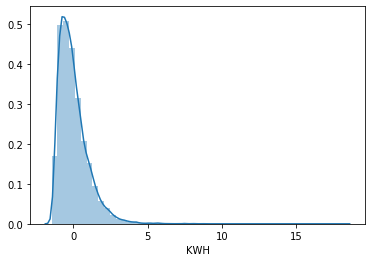

In [69]:
sns.distplot(scaled_data.KWH)

# Scaling Playground

This is a space to try different scalers or encondings methods to improve overall perfomance of models

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaled_data2=scaler.fit_transform(data_one_hot)
scaled_data2=pd.DataFrame(scaled_data2)
scaled_data2.columns=data_one_hot.columns

In [71]:
scaled_data2

,TYPEHUQ_1,TYPEHUQ_2,TYPEHUQ_3,TYPEHUQ_4,TYPEHUQ_5,AIA_Zone_1,AIA_Zone_2,AIA_Zone_3,AIA_Zone_4,AIA_Zone_5,...,TOTUCSQFT,HDD65,CDD65,TOTROOMS,NUMFRIG,TVCOLOR,NUMPC,NUMBERAC,NUMCFAN,KWH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.103682,0.378603,0.197080,0.363636,0.285714,0.285714,0.133333,0.000000,0.200000,0.122799
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.037095,0.212535,0.036314,0.136364,0.142857,0.142857,0.133333,0.000000,0.000000,0.034153
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.024483,0.497645,0.092153,0.045455,0.142857,0.071429,0.066667,0.111111,0.066667,0.014650
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.037095,0.481756,0.122628,0.272727,0.285714,0.357143,0.133333,0.000000,0.066667,0.066548
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.177316,0.430180,0.128102,0.181818,0.142857,0.142857,0.133333,0.000000,0.000000,0.018983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.154595,0.612455,0.060584,0.227273,0.142857,0.142857,0.066667,0.000000,0.200000,0.050786
12079,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.166467,0.518978,0.000000,0.142857,0.071429,0.000000,0.000000,0.000000,0.011954
12080,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.037095,0.633533,0.086131,0.318182,0.285714,0.285714,0.066667,0.000000,0.133333,0.065343
12081,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.112214,0.465788,0.140511,0.181818,0.285714,0.142857,0.066667,0.000000,0.133333,0.031836


In [72]:
scaled_data2.describe()

,TYPEHUQ_1,TYPEHUQ_2,TYPEHUQ_3,TYPEHUQ_4,TYPEHUQ_5,AIA_Zone_1,AIA_Zone_2,AIA_Zone_3,AIA_Zone_4,AIA_Zone_5,...,TOTUCSQFT,HDD65,CDD65,TOTROOMS,NUMFRIG,TVCOLOR,NUMPC,NUMBERAC,NUMCFAN,KWH
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,...,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,0.044774,0.645783,0.073657,0.076637,0.159149,0.097823,0.204419,0.254821,0.220806,0.222130,...,0.085146,0.330649,0.258286,0.227058,0.180785,0.184870,0.092449,0.044259,0.141063,0.075023
std,0.206815,0.478295,0.261223,0.266025,0.365830,0.297088,0.403293,0.435778,0.414807,0.415695,...,0.098725,0.185051,0.207055,0.099041,0.073615,0.097663,0.079450,0.098753,0.134690,0.050861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018919,0.175449,0.102372,0.181818,0.142857,0.142857,0.066667,0.000000,0.000000,0.038739
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.049430,0.357924,0.190693,0.227273,0.142857,0.142857,0.066667,0.000000,0.133333,0.063939
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.125985,0.472096,0.346168,0.272727,0.142857,0.214286,0.133333,0.000000,0.200000,0.098165
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


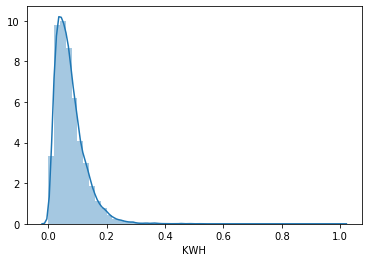

In [73]:
sns.distplot(scaled_data2.KWH)

### -----------------------------------------------------------------End Playground---------------------------------------------------------------------

# Modeling

In machine learning there are several option for prediction using supervised methods. However, I have decided to use three models based on the utilization and common application in the field and from those three I will compared their performace to selecte the best.
    1. Linear Regression
    1A. Linear regression with Regularization
    2. Random Forest Regressor
    3. Fully Connected Neural Network

In [74]:
#Define features
# Feature Input
X=scaled_data2.drop("KWH",axis=1)
# Label target
y=scaled_data2["KWH"]

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 342 entries, TYPEHUQ_1 to NUMCFAN
dtypes: float64(342)
memory usage: 31.5 MB


In [76]:
y

0        0.122799
1        0.034153
2        0.014650
3        0.066548
4        0.018983
           ...   
12078    0.050786
12079    0.011954
12080    0.065343
12081    0.031836
12082    0.011628
Name: KWH, Length: 12083, dtype: float64

### Linear Regression

Linear regression will provide a baseline performance and I decided to use it based on the nature of the target variable (continuos) and the versatility to use continuos or discrete independet variables to generate the regressor. 

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [78]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)# print intercept and coefficients

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# pair the feature names with the coefficients
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TYPEHUQ_1,-5.945125e+10
TYPEHUQ_2,-5.945125e+10
TYPEHUQ_3,-5.945125e+10
TYPEHUQ_4,-5.945125e+10
TYPEHUQ_5,-5.945125e+10
...,...
NUMFRIG,2.879524e-01
TVCOLOR,2.587891e-02
NUMPC,1.121616e-02
NUMBERAC,-1.357269e-02


In [80]:
# calculate the R-squared for our fit
train_score=lm.score(X_train, y_train)
train_score

0.6327217978735289

In [81]:
test_score=lm.score(X_test,y_test)
test_score

0.6133642461834912

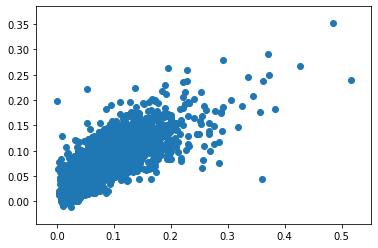

In [82]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

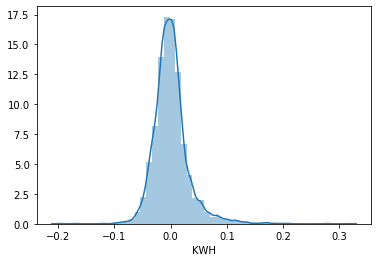

In [83]:
sns.distplot((y_test-predictions),bins=50)

In [84]:
from sklearn import metrics
print('Linear Regression MAE:', metrics.mean_absolute_error(y_test, predictions))
print('Linear Regression MSE:', metrics.mean_squared_error(y_test, predictions))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Linear Regression MAE: 0.021747058287004954
Linear Regression MSE: 0.0010081306269250324
Linear Regression RMSE: 0.03175107284683515


In [159]:
#Summary table to compare TRUE value to PREDICTED value
df_predictions=pd.DataFrame(predictions)
df_y_test=pd.DataFrame(y_test)
df_y_test=df_y_test.reset_index(drop=True)
results_table=pd.concat([df_predictions, df_y_test], axis=1)

In [162]:
results_table.columns=["Predicted", "Ground Truth"]
results_table

,Predicted,Ground Truth
0,0.064453,0.053835
1,0.045776,0.054800
2,0.073120,0.054966
3,0.062988,0.061044
4,0.023193,0.041794
...,...,...
3620,0.050415,0.057090
3621,0.067017,0.045794
3622,0.071655,0.076958
3623,0.150513,0.138495


In [85]:
from sklearn.model_selection import cross_validate
lm = LinearRegression()
cv_results = cross_validate(lm, X_train, y_train, cv=10)

In [86]:
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score']

In [87]:
cv_results['test_score']

array([0.6128005 , 0.61714748, 0.58812237, 0.60110772, 0.59132981,
       0.61221017, 0.60212881, 0.60259637, 0.55787966, 0.58096997])

### Lasso Regression

I decided to try a regularization that penalizes features that do not contribute to the model or are considered outliners. In this case L1 or lasso regression will make zero features that are not helping to predict consumption. It might produce a better final performance since the algorithm will adapt better to less features with important patterns.

In [88]:
from sklearn.linear_model import Lasso
lassom=Lasso(alpha=0.0000001, max_iter=10e5, normalize=True)
lassom.fit(X_train,y_train)

Lasso(alpha=1e-07, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
# pair the feature names with the coefficients
coeff_df = pd.DataFrame(lassom.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TYPEHUQ_1,0.014686
TYPEHUQ_2,0.004779
TYPEHUQ_3,-0.000000
TYPEHUQ_4,-0.001860
TYPEHUQ_5,-0.005265
...,...
NUMFRIG,0.275061
TVCOLOR,0.025588
NUMPC,0.011110
NUMBERAC,-0.013157


In [90]:
# calculate the R-squared for our fit
train_score=lassom.score(X_train, y_train)
train_score

0.6338687840499198

In [91]:
test_score=lassom.score(X_test,y_test)
test_score

0.6146745117938921

In [92]:
prediction_lasso = lassom.predict(X_test)
print('Lasso Regression MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('Lasso Regression MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('Lasso Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

Lasso Regression MAE: 0.02169797238399967
Lasso Regression MSE: 0.0010047141842442586
Lasso Regression RMSE: 0.031697226759517284


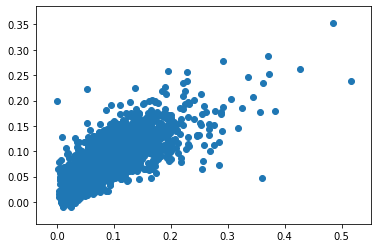

In [120]:
plt.scatter(y_test, prediction_lasso)

### Ridge regression

In [140]:
from sklearn.linear_model import Ridge
ridgem=Ridge(alpha=0.000001, max_iter=10e5, normalize=True)
ridgem.fit(X_train,y_train)

Ridge(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [141]:
# pair the feature names with the coefficients
coeff_df = pd.DataFrame(ridgem.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TYPEHUQ_1,0.013070
TYPEHUQ_2,0.003135
TYPEHUQ_3,-0.001637
TYPEHUQ_4,-0.003555
TYPEHUQ_5,-0.006952
...,...
NUMFRIG,0.285359
TVCOLOR,0.025598
NUMPC,0.010602
NUMBERAC,-0.013965


In [142]:
# calculate the R-squared for our fit
train_score=ridgem.score(X_train, y_train)
train_score

0.633889821751001

In [143]:
test_score=ridgem.score(X_test,y_test)
test_score

0.614223071981247

In [144]:
prediction_rg = ridgem.predict(X_test)
print('Ridge Regression MAE:', metrics.mean_absolute_error(y_test, prediction_rg))
print('Ridge Regression MSE:', metrics.mean_squared_error(y_test, prediction_rg))
print('Ridge Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rg)))

Ridge Regression MAE: 0.02172156490190635
Ridge Regression MSE: 0.0010058912877502029
Ridge Regression RMSE: 0.03171578924999665


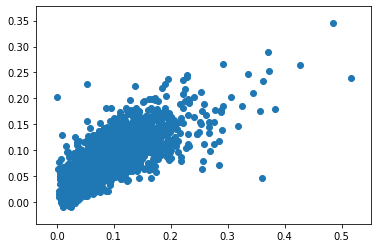

In [119]:
plt.scatter(y_test, prediction_rg)

### Playgroung Polynomial model

In [94]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_poly=poly_reg.fit_transform(X_train)

In [95]:
lm_pol=LinearRegression()
lm_pol.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
# calculate the R-squared for our fit
train_score=lm_pol.score(X_train_poly, y_train)
train_score

1.0

In [97]:
X_test_poly=poly_reg.fit_transform(X_test)

In [98]:
test_score=lm_pol.score(X_test_poly,y_test)
test_score

-0.16956419420446633

In [99]:
prediction_pol = lm_pol.predict(X_test_poly)
print('Lasso Regression MAE:', metrics.mean_absolute_error(y_test, prediction_pol))
print('Lasso Regression MSE:', metrics.mean_squared_error(y_test, prediction_pol))
print('Lasso Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_pol)))

Lasso Regression MAE: 0.04167085140541745
Lasso Regression MSE: 0.003049571780917055
Lasso Regression RMSE: 0.05522292803643297


#### -----------------------------------------------------------------------End playground------------------------------------------------------------------------------------------

### Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor()
rm.fit(X_train,y_train)

C:\Users\davje\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [101]:
prediction_rm= rm.predict(X_test)
#MAE = mean_absolute_error(y_test , prediction_rm)
print('Random forest MAE:', metrics.mean_absolute_error(y_test, prediction_rm))
print('Random forest MSE:', metrics.mean_squared_error(y_test, prediction_rm))
print('Random forest RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rm)))

Random forest MAE: 0.022739241805633154
Random forest MSE: 0.001144839135104509
Random forest RMSE: 0.033835471551383896


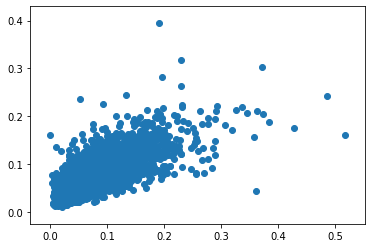

In [102]:
plt.scatter(y_test, prediction_rm)

### Fully Connected Neural Network

Fully connected NN are commonly used for regression. The initial idea is to create a NN baseline which is a simple model that has a single fully connected hidden layer with the same number of neurons as input attributes (112).

I followed recommended parameter such as Adam optimizer, and ReLU activation fucntion that are commonly used for regression in the literature.

In [103]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [104]:
# Base line model
b_model=Sequential()
b_model.add(Dense(112, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))
b_model.add(Dense(1, kernel_initializer='normal'))
b_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
b_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 112)               38416     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 113       
Total params: 38,529
Trainable params: 38,529
Non-trainable params: 0
_________________________________________________________________


In [105]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
b_model.fit(X_train,y_train, epochs=10, validation_split = 0.2, callbacks=callbacks_list)


Train on 6766 samples, validate on 1692 samples
Epoch 1/10
6766/6766 [==============================] - 0s 58us/step - loss: 0.0026 - mean_absolute_error: 0.0352 - val_loss: 0.0012 - val_mean_absolute_error: 0.0258

Epoch 00001: val_loss improved from inf to 0.00122, saving model to Weights-001--0.00122.hdf5
Epoch 2/10
6766/6766 [==============================] - 0s 39us/step - loss: 0.0012 - mean_absolute_error: 0.0248 - val_loss: 0.0014 - val_mean_absolute_error: 0.0291

Epoch 00002: val_loss did not improve from 0.00122
Epoch 3/10
6766/6766 [==============================] - 0s 40us/step - loss: 0.0011 - mean_absolute_error: 0.0232 - val_loss: 0.0012 - val_mean_absolute_error: 0.0245

Epoch 00003: val_loss improved from 0.00122 to 0.00116, saving model to Weights-003--0.00116.hdf5
Epoch 4/10
6766/6766 [==============================] - 0s 38us/step - loss: 9.7918e-04 - mean_absolute_error: 0.0220 - val_loss: 0.0012 - val_mean_absolute_error: 0.0253

Epoch 00004: val_loss did not imp

In [106]:
# Make predictions using baseline neural network
prediction_fnn=b_model.predict(X_test)

In [107]:
print('Neural Network MAE:', metrics.mean_absolute_error(y_test, prediction_fnn))
print('Neural Network MSE:', metrics.mean_squared_error(y_test, prediction_fnn))
print('Neural Networ RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_fnn)))

Neural Network MAE: 0.0240892373770101
Neural Network MSE: 0.001304419109258472
Neural Networ RMSE: 0.036116742783070456


### A Deeper Neural Network

I added more layers to see if the performance can be improved or it gets worst.
I am using MSE as the metric for measuring overall performance 

In [108]:
NN_model=Sequential()
#Input Layer
NN_model.add(Dense(512, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(16, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(8, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(4, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               175616    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 350,209
Trainable params: 350,209
Non-trainable params: 0
________________________________________________

In [109]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [110]:
NN_model.fit(X_train,y_train, epochs=25, validation_split = 0.2, callbacks=callbacks_list)


Train on 6766 samples, validate on 1692 samples
Epoch 1/25
6766/6766 [==============================] - 1s 103us/step - loss: 0.0242 - mean_absolute_error: 0.0242 - val_loss: 0.0225 - val_mean_absolute_error: 0.0225

Epoch 00001: val_loss improved from inf to 0.02248, saving model to Weights-001--0.02248.hdf5
Epoch 2/25
6766/6766 [==============================] - 1s 86us/step - loss: 0.0214 - mean_absolute_error: 0.0214 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213

Epoch 00002: val_loss improved from 0.02248 to 0.02131, saving model to Weights-002--0.02131.hdf5
Epoch 3/25
6766/6766 [==============================] - 1s 86us/step - loss: 0.0204 - mean_absolute_error: 0.0204 - val_loss: 0.0216 - val_mean_absolute_error: 0.0216

Epoch 00003: val_loss did not improve from 0.02131
Epoch 4/25
6766/6766 [==============================] - 1s 88us/step - loss: 0.0200 - mean_absolute_error: 0.0200 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214

Epoch 00004: val_loss did not improv

In [111]:
# Make predictions using baseline neural network
prediction_dnn=NN_model.predict(X_test)

In [112]:
print('Neural Network MAE:', metrics.mean_absolute_error(y_test, prediction_dnn))
print('Neural Network MSE:', metrics.mean_squared_error(y_test, prediction_dnn))
print('Neural Networ RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_dnn)))

Neural Network MAE: 0.022265850109389577
Neural Network MSE: 0.001130859781356192
Neural Networ RMSE: 0.03362825867267278


The baseline deep NN has a lower MSE which indicated that adding more layers improves the overall performance.

# Analysis write-up

The RECS survey provides more than 900 variables (categorical and numeric values) regarding the characteristics of the end uses of energy in residential houses in the USA.
The goal of this project was to consider the biggest number of RELEVANT independent variables that can help to predict the consumption of energy in kWh. The first assumption was to focus this analysis only on equipment that uses electricity and variables that have a correlation with the consumption of electricity. Therefore, after cleaning, exploring, and selecting features I ended up with a data set of 112 independent variables divided into groups such as weather, tv, swimming pool, refrigerator, etc.
By reducing feature dimensionality, I tried to avoid variability that might affect the final performance of the model.

The equation for the total consumption of energy in kWh (target variable) uses an appropriate combination of unit energy-related characteristics, appliance electronics information, household demographic variables, and weather data as independent variables. 

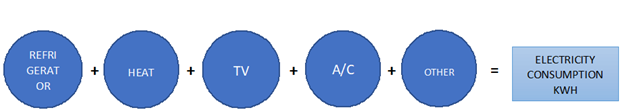
 

The different ML algorithms intend to express consumption based on each end-use component as a linear or non-linear expression of the most relevant explanatory variables.

There are several regression methods available in the literature for the prediction of continuous variables such as KWH. I considered three factors to select the most suitable algorithm: number and type of independent variables, type of dependent variable, and shape of the regression.
As a baseline, I considered a linear regression so I could compare the improvement in performance produced by other algorithms.

I selected Mean Squared Error (MSE) and Mean Absolute Error (MAE) as my metrics to evaluate the performance of the models. MSE is useful when we have very high or low values that we need to monitor and pay attention to. In both cases the lower the better. A small MAE (close to zero) suggests the model is getting better at predicting the dependent variable, while a large MAE suggests that the model may have trouble in certain areas.
Linear regression without regularization started with a high MAE and MSE greater than 1. After trying a different scaler, the MAE and MSE improved as low as 0.016 and 0.001 respectively.

By using the following independent variables:

- KWHSPH	Electricity usage for space heating, in kilowatt-hours, 2009
- KWHCOL	Electricity usage for air-conditioning, central and window/wall (room), in kilowatt-hours, 2009
- KWHWTH	Electricity usage for water heating, in kilowatt-hours, 2009
- KWHRFG	Electricity usage for refrigerators, in kilowatt-hours, 2009
- KWHOTH	Electricity usage for other purposes (all end-uses except SPH, COL, WTH, and RFG), in kilowatt-hours, 2009

The linear model produces an R^2 of 99% since those features are highly related to the final consumption in kWh. However, obtaining those variables might require submeters to measure exact end-use consumption within each sample household which is not the case in real-life problems. 

The next step was to use a regularization parameter, the Lasso regression, that did not produce any significant difference rather than a very small improvement in the final performance. On the other hand, Random forest has a bigger MAE, approximately 0.02; therefore, I decided to train a fully connected neural network.

The baseline neural network (one hidden layer) produced a model that performs worse than the Linear regression without penalization. This condition suggested that training a deeper neural network may produce a better performance. Several architectures were tested with better results than the baseline and as good as the Linear Regression. After four hidden layers with 256, 128, 64, and 32 neurons respectively, the NN does not improve the overall performance significantly.

I decided to train a neural network because NNs are well-known for “learning” patterns from the data without the need for creating sophisticated features (feature engineering). However, in this specific case, the performance did not improve considerably which suggested that other features should be added. Further steps suggest selecting a different set of features or creating features based on electric characteristics of the appliances and behavioral consumption. 

The first idea that I would try is to find the characteristic consumption of common appliances at home such as TV, refrigerator, lights, A/C, etc. and create a feature that considered the number of these appliances at home and the usage during the day. To create these features, I will use the variables described above (KWHSPH, KWHCOL, KWHWTH, KWHRFG, KWHOTH) to have an approximation of the KWH per house and appliance. I think that will help the model to create a better prediction.

In conclusion, linear regression produces an R^2 of 62% using test data and other algorithms produced a similar performance which suggests further exploration of features to improve performance since I may have dropped features that describe the behavior of de consumption based on end-uses. This trial-error process is a part of the development of an ML model.

Given the models that I have trained, they suggested that it will be possible to predict energy consumption in kWh based on energy-related characteristics, appliance electronics information, household demographic variables, and weather with an acceptable confidence without the installation of specific meters to monitor and collect data about the usage of ELECTRICITY in residential houses.  This model will allow decision makers to create guidelines regarding design of future buildings and suggest actions for a more efficient use of the energy in daily life activities. 
